<a href="https://colab.research.google.com/github/Gaurav2912/Telecom-Churn-Analysis---Capstone-Project/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Goal :Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

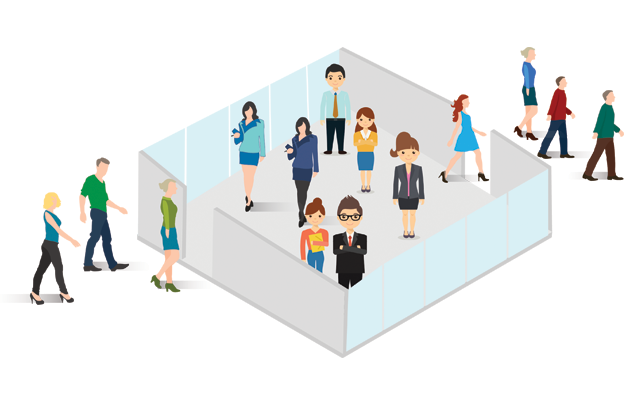

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=1q12QkUJV93coNY1p2iQV15UHxfkH4na0" align="left" hspace="25px" vspace="20px" width="40" height="50" ></p>

#What is customer churn?

Customer churn is the term used when an existing customer stops using a company’s services and/or stops buying their products. In other words, the customer chooses to cut his ties with the company. 

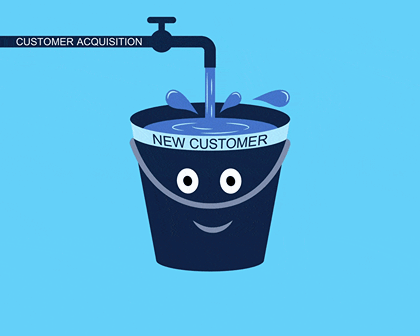

# **Customer churn rate** 
 is defined as the proportion of customers who
stopped using a particular company’s products or services during
a definite time frame.
<br/>
<br/>

Mathematically


<br/>

\begin{align}
        \text{C(T)} = \frac{\text{A(T)}}{\text{B(T)}} \times 100
    \end{align}



where,

**C** represents the churn % for a time frame T,

**A(T)** represents the total number of customers after time T,

**B(T)** represents the total number of customers before time T.

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=1pNPWpgMSrFyFEo7TLhqOZXnSTicDLHLe" align="left" hspace="10px" vspace="10px" width="55" height="65" ></p>


# All features

* **State:** 51 Unique States in United States of America

* **Account Length:**  Length of The Account

* **Area Code :** 3 unique codes, 408 is of San Jose, 415 is of San Francisco and 510 is of City of Okland

* **International Plan:** Yes Indicate International Plan is Present and No Indicates no subscription for Internatinal Plan

* **Voice Mail Plan:** Yes Indicates Voice Mail Plan is Present and No Indicates no subscription for Voice Mail Plan

* **Number vmail messages:** Number of Voice Mail Messages ranging from 0 to 51.

* **Total day minutes:** Total Number of Minutes Spent By Customers in Morning

* **Total day calls:** Total Number of Calls made by Customer in Morning.

* **Total day charge:** Total Charge to the Customers in Morning.

* **Total eve minutes:** Number of Minutes Spent By Customers in Evening

* **Total eve calls:** Total Number of Calls made by Customer in Evening.

* **Total eve charge:** Total Charge to the Customers in Evening.

* **Total night minutes:** Total Number of Minutes Spent By Customers in the Night.

* **Total night calls:** Total Number of Calls made by Customer in Night.

* **Total night charge:** Total Charge to the Customers in Night.

* **Total intl minutes:** Total Number of Minutes Spent By Customers in international calls.

* **Total intl calls:**  Total Number of International calls made by Customer.

* **Total intl charge:** Total charge to Customers in international calls.

* **Customer service calls:** Total number of Calls by Customer to service Center, ranging from 0 to 9.

* **Churn:** Whether he customer churned or not(True or False).

In [1]:
# Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Installing some important libraries**

In [2]:
!pip install plotly
!pip install cufflinks
!pip install chart-studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 20.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.7 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=0d4fd498575a201daf561dace74e8b62df1f7b39a160de494875942fe147654c
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


**Imports for Reading, Exploring and Visulization of the Data**

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import chart_studio.plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
from plotly.subplots import make_subplots
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython import display

# for removing Future Warnings in seaborn plots
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)
%matplotlib inline

In [4]:
# For displaying ploty plot in colab nootbook
import plotly.io as pio
pio.renderers.default = "colab"

In [5]:
# Read the csv file from google drive
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EDA project/EDA/Telecom Churn.csv')

In [6]:
# Head of the data frame
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [7]:
# tail of the data frame
df.tail()

State  Account length  Area code International plan Voice mail plan  \
3328    AZ             192        415                 No             Yes   
3329    WV              68        415                 No              No   
3330    RI              28        510                 No              No   
3331    CT             184        510                Yes              No   
3332    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
3328                     36              156.2               77   
3329                      0              231.1               57   
3330                      0              180.8              109   
3331                      0              213.8              105   
3332                     25              234.4              113   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
3328             26.55              215.5              126             18.32   
3329             39.29              153.4               55             13.04   
3330             30.74              288.8               58             24.55   
3331             36.35              159.6               84             13.57   
3332             39.85              265.9               82             22.60   

      Total night minutes  Total night calls  Total night charge  \
3328                279.1                 83               12.56   
3329                191.3                123                8.61   
3330                191.9                 91                8.64   
3331                139.2                137                6.26   
3332                241.4                 77               10.86   

      Total intl minutes  Total intl calls  Total intl charge  \
3328                 9.9                 6               2.67   
3329                 9.6                 4               2.59   
3330                14.1                 6               3.81   
3331                 5.0                10               1.35   
3332                13.7                 4               3.70   

      Customer service calls  Churn  
3328                       2  False  
3329                       3  False  
3330                       2  False  
3331                       2  False  
3332                       0  False

**Confirm quickly with .info() methods the datatypes and null values in our dataframe.**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [9]:
# conferming null values with diffretnt method 
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

* From above we can see that, there is not a single missing value anywhere in Data Frame. 

In [10]:
# Checking for Unique values 
df.nunique().sort_values()

Churn                        2
International plan           2
Voice mail plan              2
Area code                    3
Customer service calls      10
Total intl calls            21
Number vmail messages       46
State                       51
Total day calls            119
Total night calls          120
Total eve calls            123
Total intl minutes         162
Total intl charge          162
Account length             212
Total night charge         933
Total eve charge          1440
Total night minutes       1591
Total eve minutes         1611
Total day charge          1667
Total day minutes         1667
dtype: int64

**Churn, International plan, Voice mail plan** are binary categorical variable, their values are either Yes or No, Churn values are True or False.

**Area code:** 3 unique area code.


**State:** 51 states of USA.

----

This is where domain knowledge comes in, here users are spread all over the country in all 51 states of the United States, but the area code has only three values, this means that the area code does not entirely depend  on the users personal location but related to the service provider location.

In [11]:
# checking for duplicate rows in a Dataframe
duplicate = df[df.duplicated()]
duplicate

Empty DataFrame
Columns: [State, Account length, Area code, International plan, Voice mail plan, Number vmail messages, Total day minutes, Total day calls, Total day charge, Total eve minutes, Total eve calls, Total eve charge, Total night minutes, Total night calls, Total night charge, Total intl minutes, Total intl calls, Total intl charge, Customer service calls, Churn]
Index: []

 
**No duplicate data is found.**

---
Get a quick ***statistical*** summary of the numeric columns with .describe()
 
 we  notice that many columns are categorical.

statistical summary means mean, median, std, min, max and Quartiles..


In [12]:
df.describe().T

count        mean        std     min     25%     50%  \
Account length          3333.0  101.064806  39.822106    1.00   74.00  101.00   
Area code               3333.0  437.182418  42.371290  408.00  408.00  415.00   
Number vmail messages   3333.0    8.099010  13.688365    0.00    0.00    0.00   
Total day minutes       3333.0  179.775098  54.467389    0.00  143.70  179.40   
Total day calls         3333.0  100.435644  20.069084    0.00   87.00  101.00   
Total day charge        3333.0   30.562307   9.259435    0.00   24.43   30.50   
Total eve minutes       3333.0  200.980348  50.713844    0.00  166.60  201.40   
Total eve calls         3333.0  100.114311  19.922625    0.00   87.00  100.00   
Total eve charge        3333.0   17.083540   4.310668    0.00   14.16   17.12   
Total night minutes     3333.0  200.872037  50.573847   23.20  167.00  201.20   
Total night calls       3333.0  100.107711  19.568609   33.00   87.00  100.00   
Total night charge      3333.0    9.039325   2.275873    1.04    7.52    9.05   
Total intl minutes      3333.0   10.237294   2.791840    0.00    8.50   10.30   
Total intl calls        3333.0    4.479448   2.461214    0.00    3.00    4.00   
Total intl charge       3333.0    2.764581   0.753773    0.00    2.30    2.78   
Customer service calls  3333.0    1.562856   1.315491    0.00    1.00    1.00   

                           75%     max  
Account length          127.00  243.00  
Area code               510.00  510.00  
Number vmail messages    20.00   51.00  
Total day minutes       216.40  350.80  
Total day calls         114.00  165.00  
Total day charge         36.79   59.64  
Total eve minutes       235.30  363.70  
Total eve calls         114.00  170.00  
Total eve charge         20.00   30.91  
Total night minutes     235.30  395.00  
Total night calls       113.00  175.00  
Total night charge       10.59   17.77  
Total intl minutes       12.10   20.00  
Total intl calls          6.00   20.00  
Total intl charge         3.27    5.40  
Customer service calls    2.00    9.00

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**
*   Customer service calls are quite rare, we can see that most people rarely call for service.  
*   Half of the people dont use voice messages.
* International call service is also very less, but their charges are quit heigh compare to domestic calls.
* Lots of features have aproximatlly same mean and median means they are  symmetrically distributed and have zero skewness.



# Data Cleaning, Preprocessing and Feature engineering.
It is the process of using domain knowledge to extract features from raw data via data mining technique.

There are Three general approaches:
* Extracting Information
* Combining Information
* Transforming Information

Here, I am going to create few new features such as,


* Charge per minutes for day, evening and night timing also for International calls

<br/>

Formula for calculating average,

\begin{align}
        \text{Average call Rate} = \frac{\text{Total charge}}{\text{Total minutes}}
    \end{align}





In [13]:
# calculate Charge per minutes and Charge per calls for every category
df['Avg call rate day'] =  df['Total day charge'] / df['Total day minutes']
df['Avg call rate eve'] =  df['Total eve charge'] / df['Total eve minutes'] 
df['Avg call rate night'] =  df['Total night charge'] / df['Total night minutes'] 
df['Avg call rate intl'] =  df['Total intl charge'] / df['Total intl minutes']


**Correcting data types**
* We know that area code is not a hierarchical variable and data has 3 distinct unique values without any hierarchy, better convert it form numeric to object data type.

In [14]:
# convert the data type of the Area code, scince are code is kind of lable, there is no hireacry in it.
df['Area code'] = df['Area code'].astype('str')

In [15]:
# converting all binary feature to boolean data type , using map method
df['International plan'] = df['International plan'].map({'Yes': True, "No": False})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': True, "No": False})   
# although above step it is not that necessary, 
#If we have a lot of columns of above type then it is not a good idea to convert each of them

In [16]:
df.head()

State  Account length Area code  International plan  Voice mail plan  \
0    KS             128       415               False             True   
1    OH             107       415               False             True   
2    NJ             137       415               False            False   
3    OH              84       408                True            False   
4    OK              75       415                True            False   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  ...  Total night charge  \
0             45.07              197.4  ...               11.01   
1             27.47              195.5  ...               11.45   
2             41.38              121.2  ...                7.32   
3             50.90               61.9  ...                8.86   
4             28.34              148.3  ...                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  Avg call rate day  Avg call rate eve  \
0                       1  False           0.170011           0.085005   
1                       1  False           0.169988           0.085013   
2                       0  False           0.170008           0.084983   
3                       2  False           0.170007           0.084976   
4                       3  False           0.170006           0.085030   

   Avg call rate night  Avg call rate intl  
0             0.044994            0.270000  
1             0.045008            0.270073  
2             0.045018            0.269672  
3             0.044997            0.269697  
4             0.044997            0.270297  

[5 rows x 24 columns]

In [17]:
# New features 
all_per_minutes = ['Avg call rate intl','Avg call rate day', 'Avg call rate eve', 'Avg call rate night']

Get a quick statistical summary of the new numeric columns

In [18]:
df[all_per_minutes].describe().T

count      mean       std       min       25%       50%  \
Avg call rate intl   3315.0  0.270057  0.000329  0.268182  0.269811  0.270000   
Avg call rate day    3331.0  0.170003  0.000028  0.169231  0.169989  0.170004   
Avg call rate eve    3332.0  0.085001  0.000016  0.084936  0.084988  0.085000   
Avg call rate night  3333.0  0.045000  0.000017  0.044828  0.044988  0.045000   

                          75%       max  
Avg call rate intl   0.270297  0.272727  
Avg call rate day    0.170017  0.170513  
Avg call rate eve    0.085013  0.085075  
Avg call rate night  0.045013  0.045111

**Mean, median are same and  Standard deviation is very small.**

# Exploratory data analysis

It is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations. 
____
let's do some exploration and visulization for different - different  data.

In [19]:
# set default gridtype, fontsize and palette
sns.set_style("whitegrid")
sns.set_palette(palette = ['#4169E1', '#FF5F15', '#4CBB17'])
plt.rcParams['font.size'] = 14

# Observation 1

**Display the balance of the class labels (Churn) with a Count Plot.**

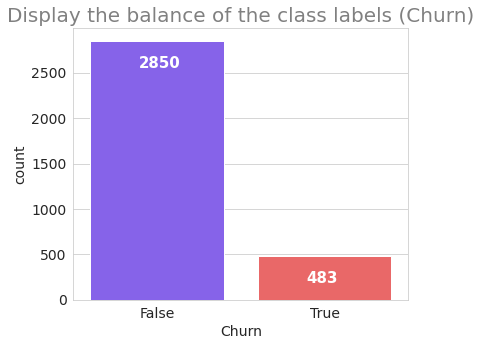

In [20]:
plt.figure(figsize= (6,5))

churn_users = sum(df['Churn'] == True)   # No. of churn users
retain_users = sum(df['Churn'] == False)  # No. of retained users
unique_label = df['Churn'].nunique()       # No. of unique label class, (2 classes)
total_users = len(df)                    # Total number of users

user_class_count = [retain_users, churn_users]  # data that we want to write on countplot 


for i in range(unique_label):
  # To write text on each bar of the bar plot
  # y is y-position of text, s is value that have to write on plot
  plt.text(x= i- 0.11,y= user_class_count[i]-300,
            s= user_class_count[i], fontsize=15, weight='bold',
                color='white')

sns.countplot(data=df,x='Churn', palette = ['#7C4DFF', '#FF5252'])
plt.title('Display the balance of the class labels (Churn)', size=20, color='grey');

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**
  * The target variable is highly imbalanced.

In [21]:
# calculate pecentage of customer that churned and not churned
churn_percent = round(100 * churn_users / total_users, 2)
retain_percent = round(100 * retain_users / total_users, 2)
# retain to churn ratio
retain_to_churn_ratio = round(retain_percent/ churn_percent, 2)
print(f"For one churned customer, we have approximate {retain_to_churn_ratio} retained customers." )

For one churned customer, we have approximate 5.9 retained customers.


[Documantation for Pie chart](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html)

**Pie chart:**

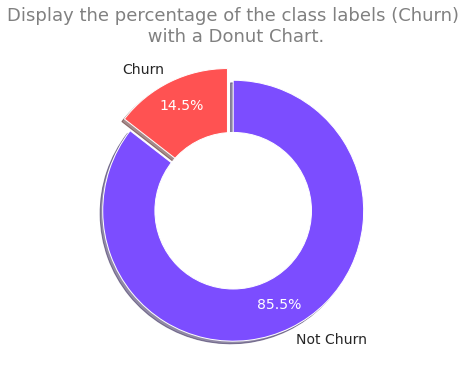

In [22]:
# labels that passed as title in pie chart
labels = ['Churn', 'Not Churn']

# Data that passed in pie chart
values = [churn_percent, retain_percent]
# degree upto which I explode the slice in pie chart
explode = (0.1, 0)  
#color palette in pie chart
colors = ['#FF5252','#7C4DFF']


plt.figure(figsize= (8,6))

#  pie chart
_, _, autotexts =  plt.pie(values,explode= explode , labels=labels, autopct='%1.1f%%',
        colors= colors,pctdistance=0.80,
        shadow=True, startangle=90,  textprops={'fontsize': 14})

# add white text on donut chart
for autotext in autotexts:
    autotext.set_color('white')

# draw white circle in the centre of pie chart to get donut chart
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# for displaying title
plt.title("Display the percentage of the class labels (Churn)\n with a Donut Chart.", fontsize= 18, color='grey');

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**

* The target variable is highly imbalanced, 14.5% of Orange Telecom's customers have churned, but from a  customer churn perspective it's still high. Our job will be to reduce it as much as possible.
* For every single churn customer  we have 5.9 retain customers.

#  Observation 2
**Lets explore the charge per minutes and our customer's talking behavior for different-different time-zone.**




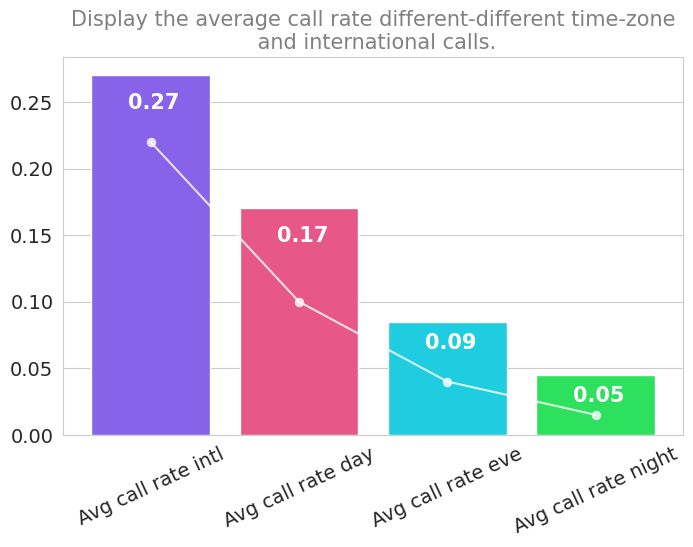

In [23]:
# adjusting figure size
plt.figure(figsize= (8,5), dpi= 100)

# add title
plt.title("Display the average call rate different-different time-zone\n and international calls.",
          fontsize= 15, color='grey')

# '''all_per_minutes''' # label on x- axis

# this is only for dots of lineplot
lineplot_zone_wise = [0.22, 0.1, 0.04, 0.015]  

# writing text on bar plot
for i, item in enumerate(all_per_minutes):
  # Calculating mean charges per minutes for all type of timezone and international calls
  mu_item= round(df[item].mean(), 2)
  # To write text on each bar of the bar plot
  plt.text(x= i- 0.15,y= mu_item - 0.025,
            s= mu_item, fontsize=15, weight='bold',
                color= 'white')
# Bar Plot 
sns.barplot(data=df[all_per_minutes], palette= ['#7C4DFF','#FF4081','#00E5FF', '#0FFF50'])

# line on bar plot
sns.lineplot(marker='o', x= all_per_minutes, y= lineplot_zone_wise , color = 'white', alpha = .8)
# Rotating x-label
plt.xticks(rotation=25);

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**

* Charges for International calls are highest, followed by day, then evening and night calls are cheapest.
* This is obvious that international calls are expensive compared to domestic calls.
* Night calls are cheaper, may be due to night tariff plans.

Median and Mean of Total day minutes : 179.40 and 179.78
Median and Mean of Total eve minutes : 201.40 and 200.98
Median and Mean of Total night minutes : 201.20 and 200.87


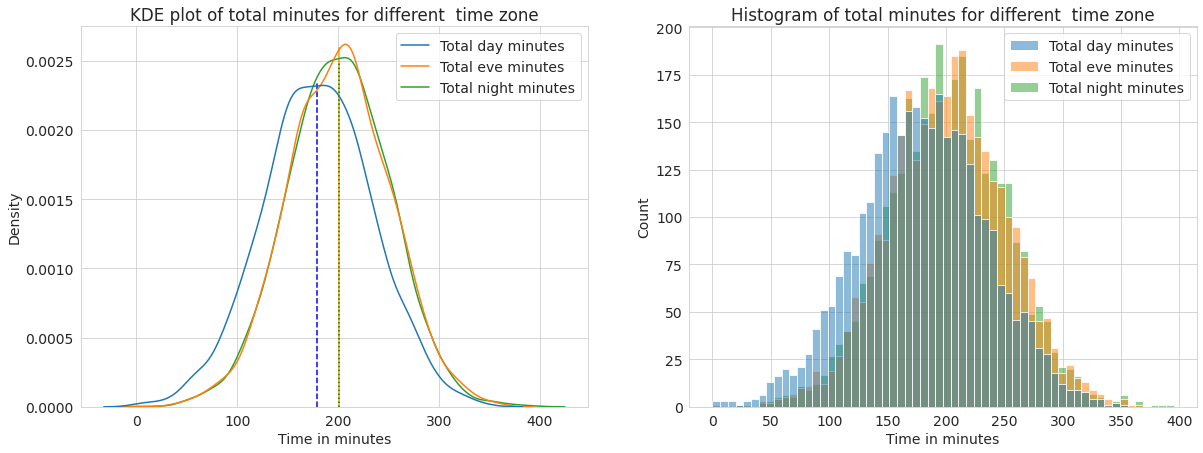

In [24]:
# creating  blank subplots
fig, ax = plt.subplots(nrows= 1, ncols= 2, figsize= (20,7))

# KDE plot for 'Total day minutes', 'Total eve minutes' and 'Total night minutes' on first subplot
sns.kdeplot(data= df[['Total day minutes', 'Total eve minutes', 'Total night minutes']], ax= ax[0], palette= 'tab10')
ax[0].set_title('KDE plot of total minutes for different  time zone')

# Histogram for 'Total day minutes', 'Total eve minutes' and 'Total night minutes' on secound sub plot
sns.histplot(data= df[['Total day minutes', 'Total eve minutes', 'Total night minutes']], ax= ax[1], palette= 'tab10')
ax[1].set_title('Histogram of total minutes for different  time zone')

# calculating median of  'Total day minutes', 'Total eve minutes' and 'Total night minutes'
med_day_min = df['Total day minutes'].median()
med_eve_min = df['Total eve minutes'].median()
med_nig_min = df['Total night minutes'].median()

# Virtical line plot at median of kde plot
ax[0].vlines(x = med_day_min, ymin = 0, ymax = 0.00234,colors = 'blue',ls= '--')
ax[0].vlines(x = med_eve_min, ymin = 0, ymax = 0.0026,colors = 'orange',ls= '-')
ax[0].vlines(x = med_nig_min, ymin = 0, ymax = 0.0025,colors = 'green',ls= ':')

# adding label on x- axes 
ax[0].set_xlabel("Time in minutes")
ax[1].set_xlabel("Time in minutes")

# Print the median and mean of for 'Total day minutes', 'Total eve minutes' and 'Total night minutes'
print(f"Median and Mean of Total day minutes : {med_day_min:.2f} and {df['Total day minutes'].mean():.2f}")
print(f"Median and Mean of Total eve minutes : {med_eve_min:.2f} and {df['Total eve minutes'].mean():.2f}")
print(f"Median and Mean of Total night minutes : {med_nig_min:.2f} and {df['Total night minutes'].mean():.2f}");

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**
 * On average, our customers prefer to talk more at night and evening than during the day.
*  Leter we will explore its cause.  


 ____
 **Droping newly created features, sence their part is done**

In [25]:
df.drop(all_per_minutes, axis= 1, inplace= True)

# Lest check our columns, after dropping
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

# Observation 3
-----
**A quick look of Histogram of each numerical attributes**, to understand their distribution.



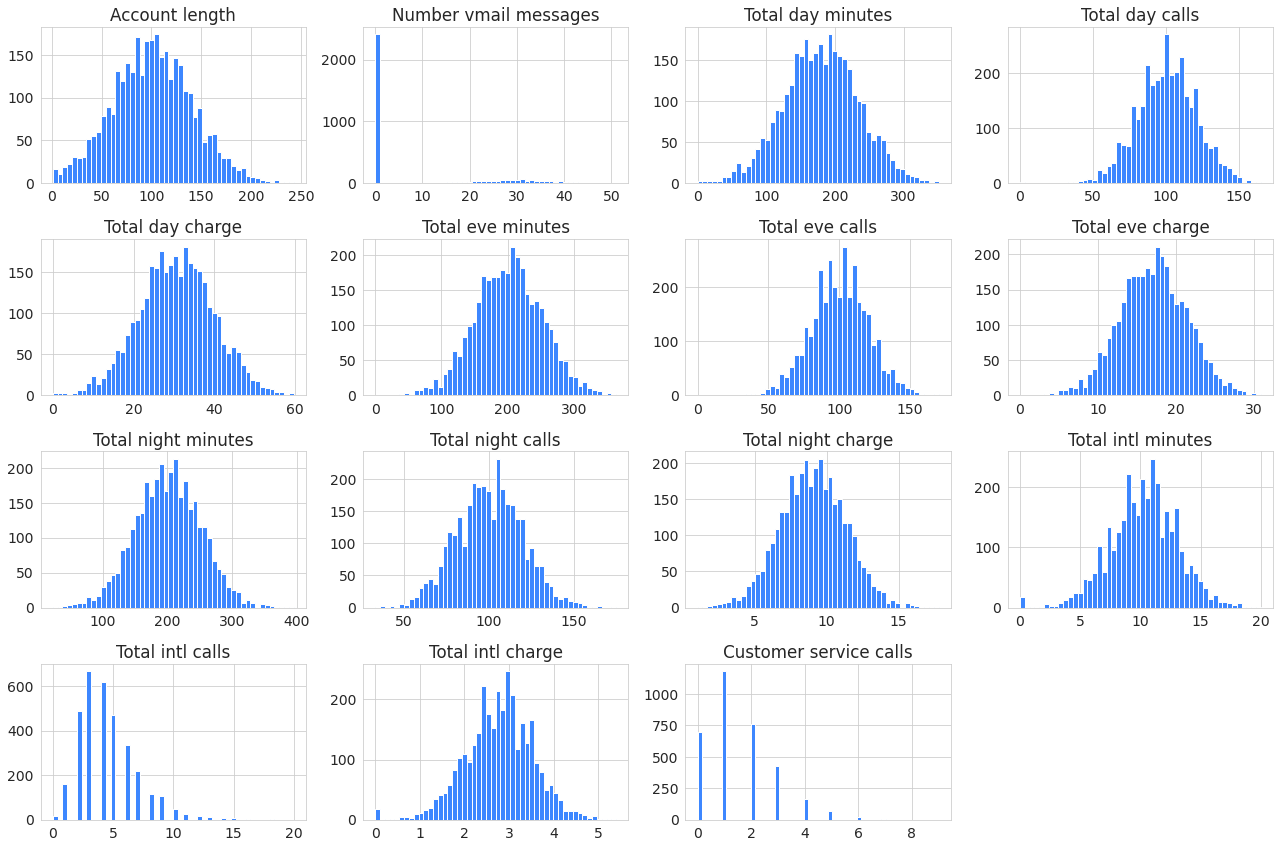

In [26]:
# plot of histogram 
df.hist(bins= 50, figsize= (18,12), color=  '#3d87ff')
# add title
plt.title("Histogram for each numerical attribute.", fontsize= 18)
# to prevent overlapping of text in plot
plt.tight_layout()
plt.show();

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**

* Most of the feature approximately follows **Normal** Distribution, means most of the values centered around mean of the distribution. As we move away from centre their value count gradually decrease.
* Most people don't send any voicemails.
* The graph of **total international calls** and **Customer service calls** are positively skewed.

# Observation 4 : Correlation check


Before doing Correlation check, we need to do one hot encoding for categorical variables.

In [27]:
df_nums = df.select_dtypes(exclude= 'object')  # data frame with numerical features (including boolean datatype)
df_objs = df.select_dtypes(include= 'object')  # data frame with categorical feature

In [28]:
df_nums.columns

Index(['Account length', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Churn'],
      dtype='object')

In [29]:
df_objs.columns

Index(['State', 'Area code'], dtype='object')

**While doing one-hot encoding we remove State feature, because it will craete too many columns (50 new columns) and bunch of zeros in that columns .**

In [30]:
# to create dummy variables, drop_firt is for one hot-encoding
df_objs = pd.get_dummies(df_objs.drop('State', axis= 1), drop_first= True)
# concatinate state , numeric and object (after one-hot encoding)  columns 
df_final = pd.concat([df['State'],df_nums, df_objs], axis= 1)

In [31]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   International plan      3333 non-null   bool   
 3   Voice mail plan         3333 non-null   bool   
 4   Number vmail messages   3333 non-null   int64  
 5   Total day minutes       3333 non-null   float64
 6   Total day calls         3333 non-null   int64  
 7   Total day charge        3333 non-null   float64
 8   Total eve minutes       3333 non-null   float64
 9   Total eve calls         3333 non-null   int64  
 10  Total eve charge        3333 non-null   float64
 11  Total night minutes     3333 non-null   float64
 12  Total night calls       3333 non-null   int64  
 13  Total night charge      3333 non-null   float64
 14  Total intl minutes      3333 non-null   

In [32]:
# for finding correlation matrix , using .corr() method
corr_df = df_final.corr()

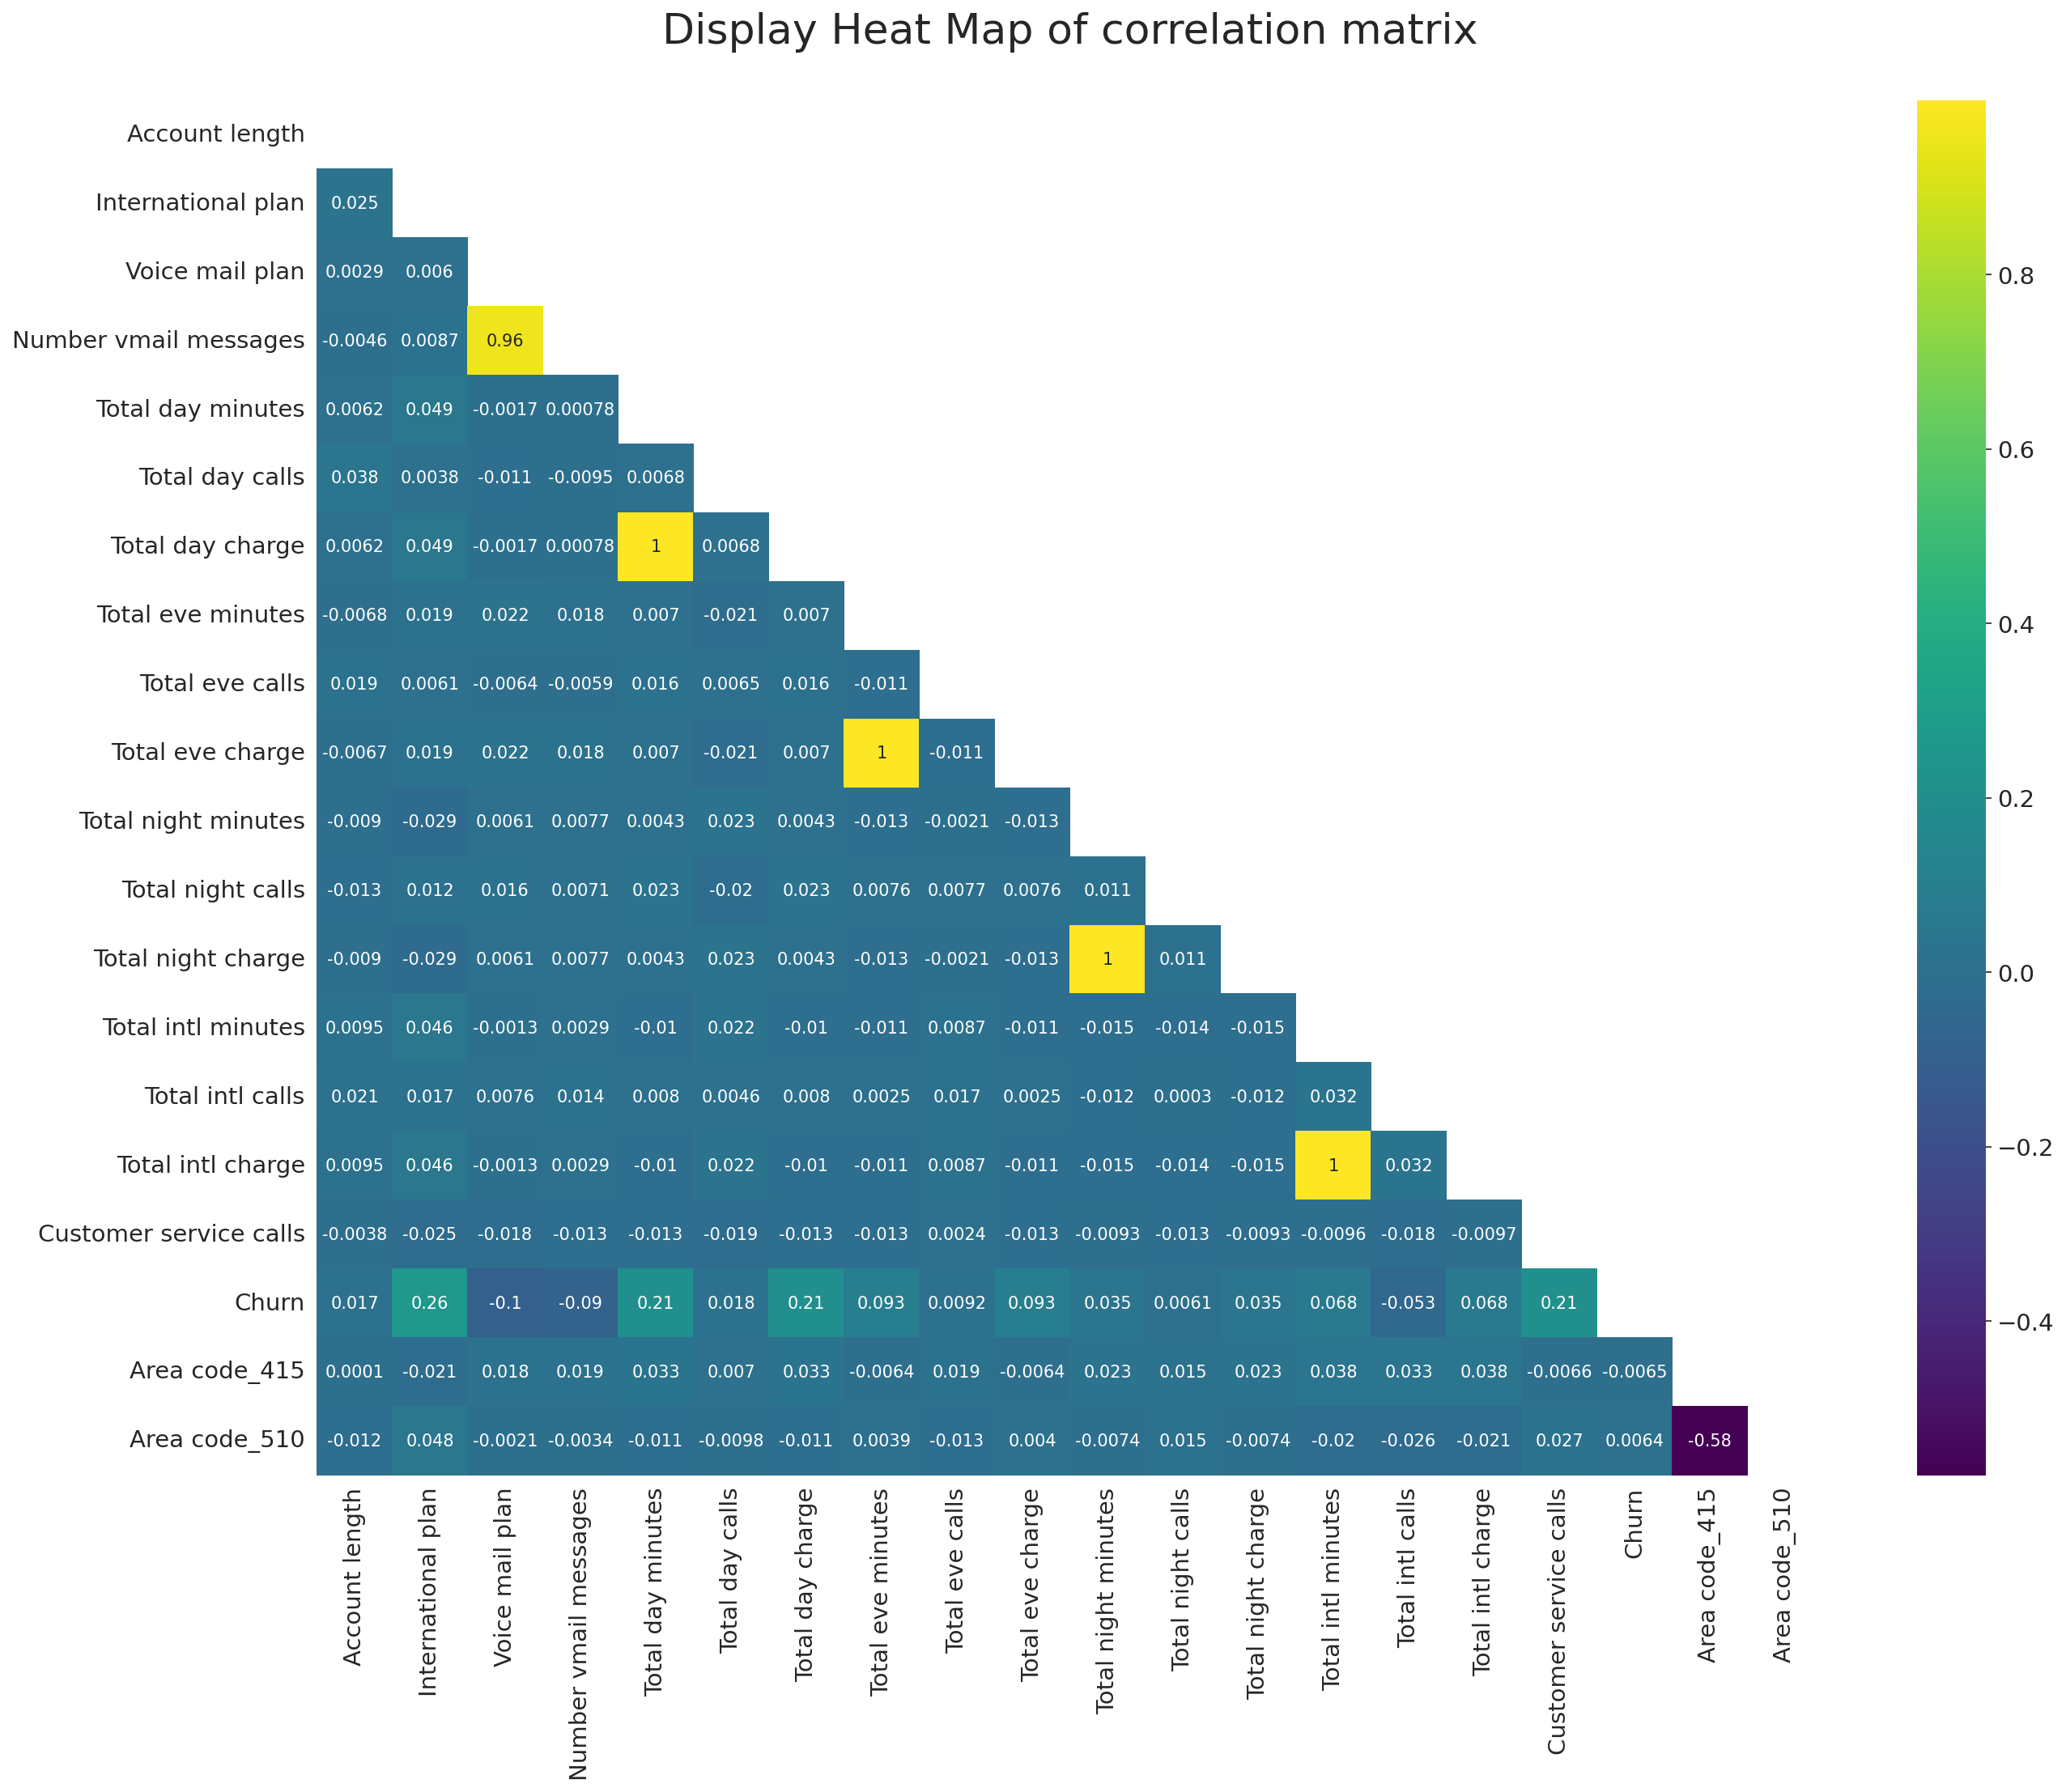

In [33]:
plt.figure(figsize= (20,15), dpi= 150)

# creating mask for lower triangular matrix
mask = np.triu(np.ones_like(corr_df))

# plotting heat map of correlation matrix
sns.heatmap(corr_df, annot= True, cmap= 'viridis', annot_kws={"size":10}, mask= mask)
# add title
plt.title("Display Heat Map of correlation matrix\n", fontsize= 25);

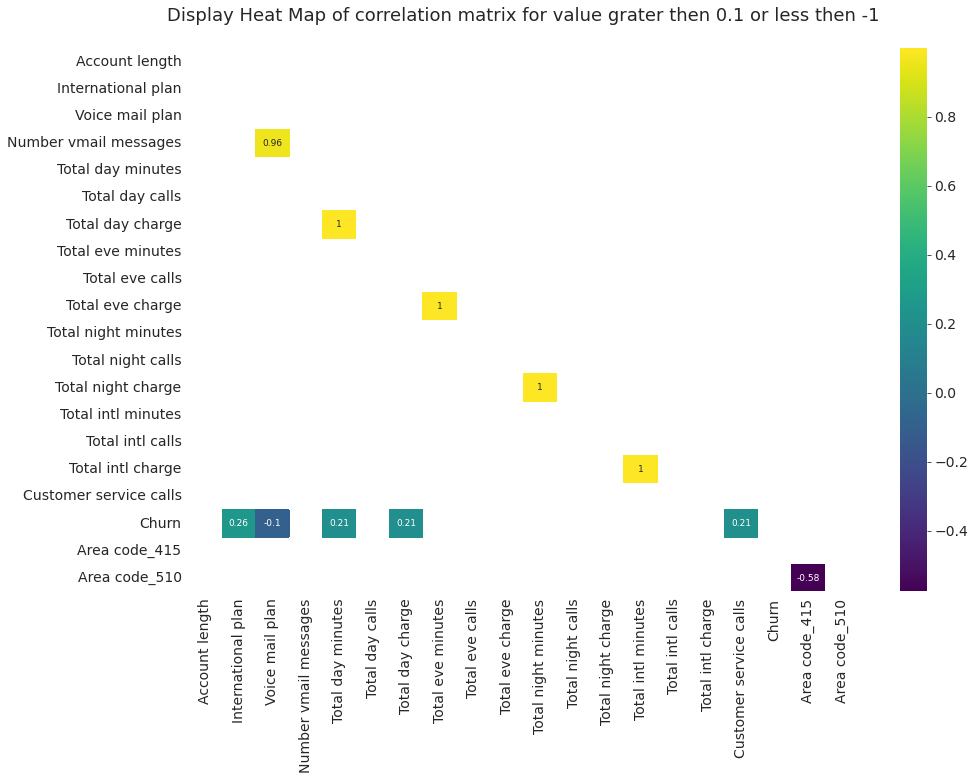

In [34]:
# for size of plot
plt.figure(figsize= (15,10))

# selecting only those features for which magnitude of correlation value grater then 0.1
sns.heatmap(corr_df[(corr_df > 0.1) | (corr_df < -0.1)], annot= True,  cmap= 'viridis',annot_kws={"size":9}, mask= mask)
# add title
plt.title("Display Heat Map of correlation matrix for value grater then 0.1 or less then -1\n", fontsize= 18);

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**


* Number of Voice mail is highly correlated with voice mail plan.
* Total day minutes is perfectly correlated with total day charge, and it follows same pattern in evening, nights minutes and international minutes with charges.

----
We will do seprate correlation analysis for all feature with Churn label.

# Correlation with labels Churn 
Let's see correlation of all features with target variable (Churn).

In [35]:
# correlation with target variable
corr_to_label  = corr_df['Churn'].sort_values(ascending= False).iloc[1:]  # first value is 1 (self correlation), so we ignoring it. 
corr_to_label  

International plan        0.259852
Customer service calls    0.208750
Total day minutes         0.205151
Total day charge          0.205151
Total eve minutes         0.092796
Total eve charge          0.092786
Total intl charge         0.068259
Total intl minutes        0.068239
Total night charge        0.035496
Total night minutes       0.035493
Total day calls           0.018459
Account length            0.016541
Total eve calls           0.009233
Area code_510             0.006423
Total night calls         0.006141
Area code_415            -0.006535
Total intl calls         -0.052844
Number vmail messages    -0.089728
Voice mail plan          -0.102148
Name: Churn, dtype: float64

**Creating bar plot for correlation value of all features with target variable**

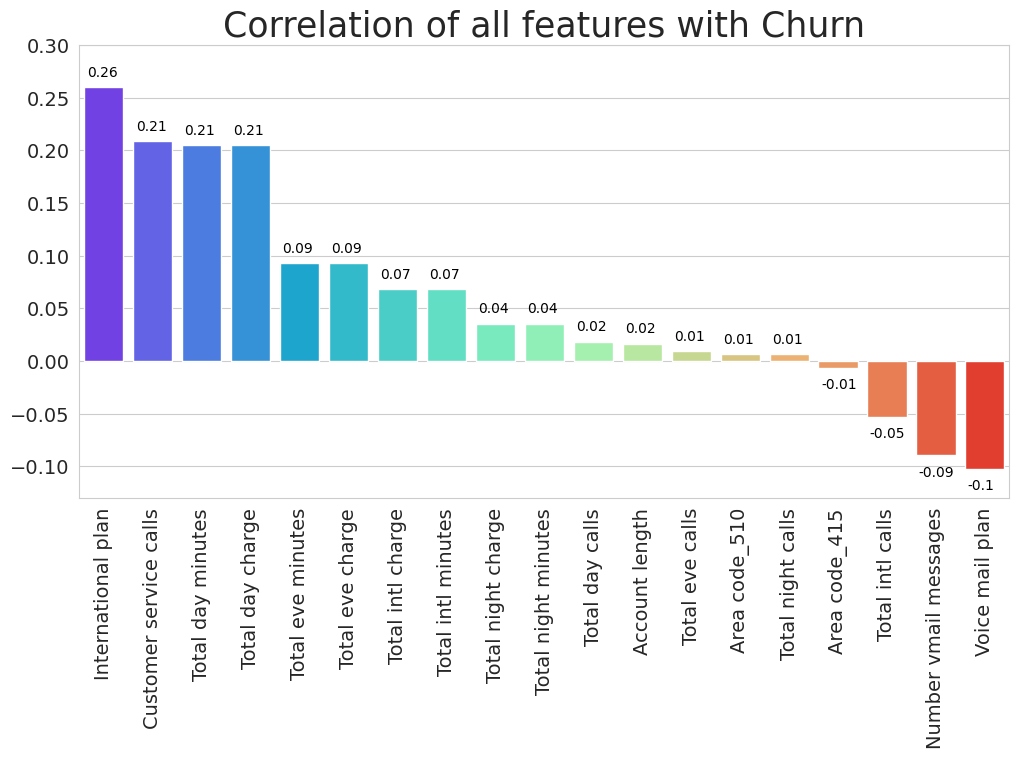

In [36]:
# for size of plot
plt.figure(figsize=(12,6), dpi= 100)
# bar plot for correlation value of all features with target variable
sns.barplot(x=corr_to_label.index,y= corr_to_label.values, palette= 'rainbow')
#  add title
plt.title("Correlation of all features with Churn", fontsize= 25)

# writing text on plot
for i in range(len(corr_to_label)):
  # positive values are on top of bar 
  if corr_to_label.iloc[i] > 0:
    plt.text(x= i- 0.35,y= corr_to_label.iloc[i] + 0.01,
           s= round(corr_to_label.iloc[i], 2), fontsize=10,
                color= 'black')
  # negative values are just below the bar
  else:
     plt.text(x= i- 0.35,y= corr_to_label.iloc[i]-0.02,
           s= round(corr_to_label.iloc[i], 2), fontsize=10,
                color= 'black')

# adjusting y-limits on y axis 
plt.ylim(-0.13,0.3)
# rotating test on x-axis  
plt.xticks(rotation=90);

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**


**Churn Lable** have 
* Positive correlation with 
  * **International plan**, means for those users who have taken the international plan, there is a high chance of getting churned.
  * **Customer service calls**,If the customer makes more service calls, the chances of churn are also higher.
  * **Total day minutes** is also positivly correlated, we will further explore it.

* Negative correlation with
  * **Voice mail plan**, means for those users who have taken the Voice mail plan, then chance of getting churn will reduce.
  * We have already seen that, if person has a voicemail plan, only then s(he)
  sends voicemail.

  * **Total international calls** , but positive corelation with **International plan**.

* Almost no relation with 
  * **Account length**, **Area code** and **total calls** at any time.

<br/>

**Let's explore a quick view of Churn behavior with all numerical features**

In [37]:
df_nums = df.select_dtypes(exclude= 'object')  # data frame with numerical features (including boolean datatype)
df_nums.columns

Index(['Account length', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Churn'],
      dtype='object')

In [38]:
# drop few columns like International plan , Voice mail plan because they binary variable 
# and also drop Churn column
df_nums = df_nums.drop(['Churn','International plan', 'Voice mail plan'], axis= 1)

# check no of ccolumns
df_nums.shape

(3333, 15)

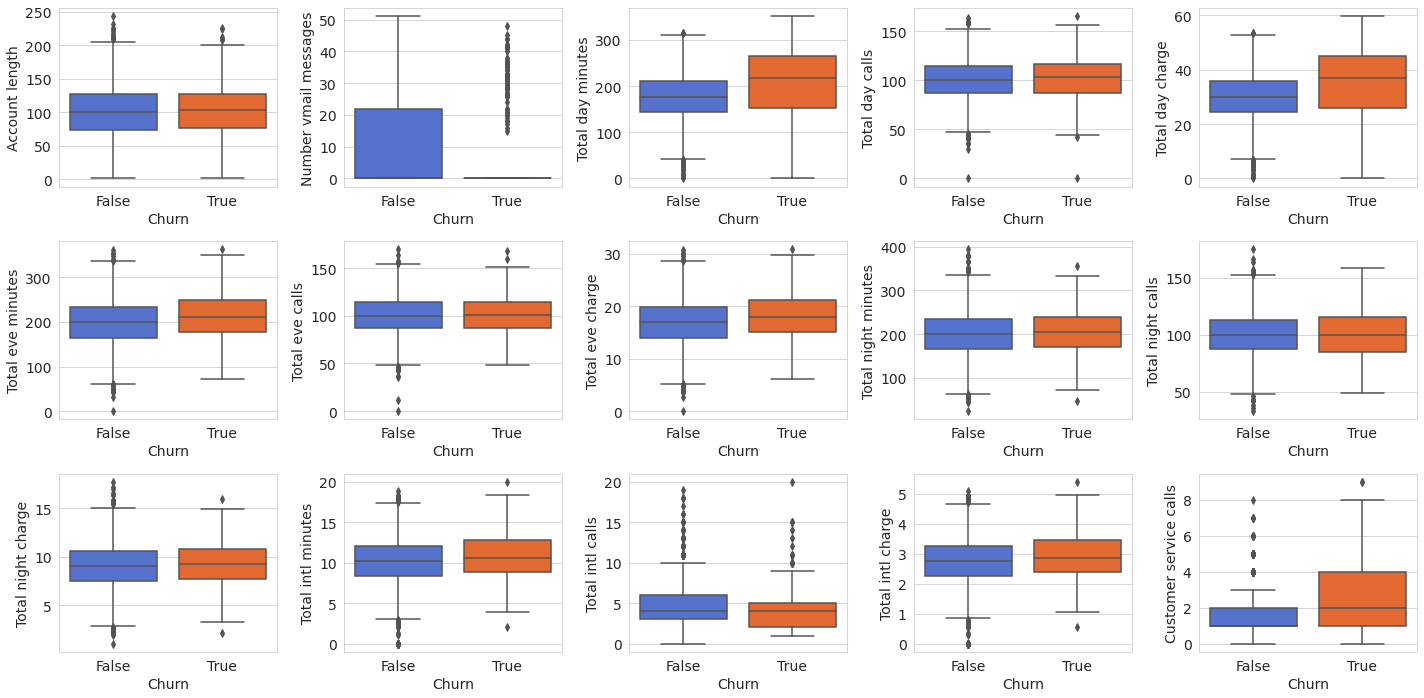

In [39]:
# create a blank canvas
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 10))
for i, col in enumerate(df_nums):
  ax = axes[ i // 5, i % 5]
  sns.boxplot(data= df, x= 'Churn', y= col, ax= ax)


# add super title for all subplots 

fig.tight_layout();

# Let's explore Churn label with all features separately
____
**Observation 5:**


**First we plot behavior with features that have no correlation with the target variable.**

In [40]:
low_cor_num_fe = ['Account length', 'Total day calls', 'Total eve calls', 'Total night calls'] # taking numeric valued variable only

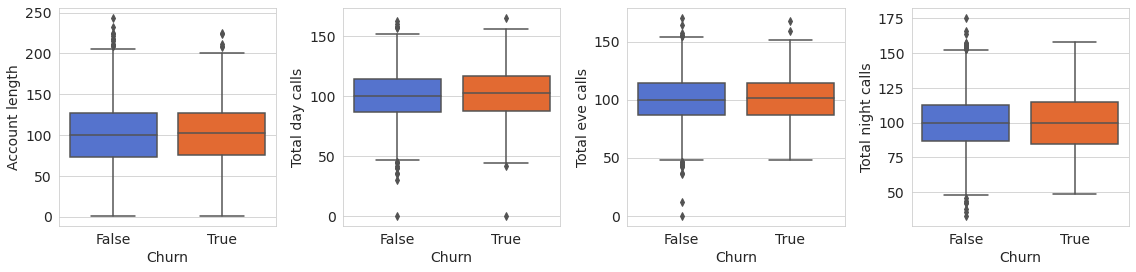

In [41]:
# Explore it on box plot
# creating blank canvas with 1 row and 4 columns
fig, ax= plt.subplots(nrows = 1, ncols = 4, figsize= (16,4))

for i, item in enumerate(low_cor_num_fe):
  # box plot of churn behavior with features that have no correlation with target variable
  sns.boxplot(data= df, y= item, x= 'Churn', ax= ax[i])

# automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.tight_layout();

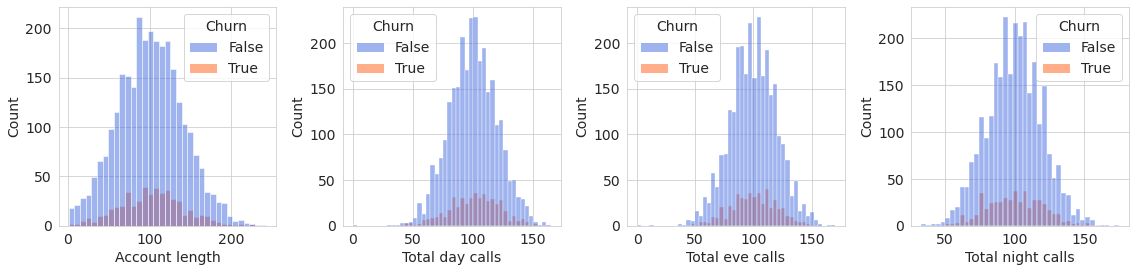

In [42]:
# Explore it on histogram
fig, ax= plt.subplots(nrows = 1, ncols = 4, figsize= (16,4))

# histogram of churn behavior with features that have no correlation with target variable
for i, item in enumerate(low_cor_num_fe):
  sns.histplot(data= df, x= item, hue= 'Churn', ax= ax[i])

plt.tight_layout();

**Creating a function for calculating churn rate**

In [43]:
# we will use this function sevral times in future
def churn_rate_finder(target):
  '''Function that create a series, which churn rate per category of target.'''
  ser= (100 * df.groupby(target)['Churn'].mean())  # groupby on that featue then mean of churn and multiplied with 100
  return ser

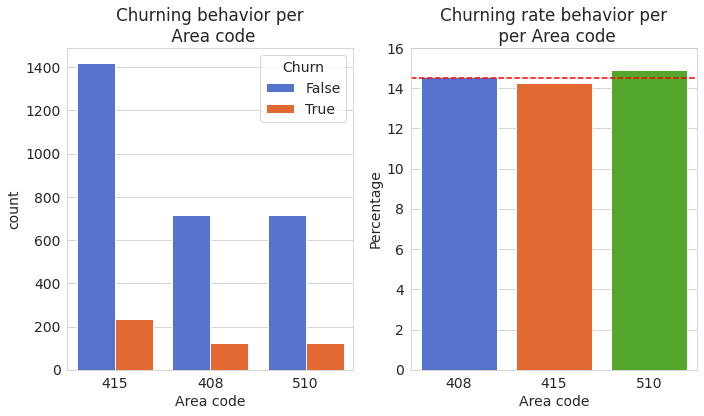

In [44]:
# For the state (another feature that have low correlation value with Churn)

# Create figure object
fig, ax = plt.subplots(nrows= 1, ncols= 2, figsize= (10,6))

# count plot for Area code heu colored by churn
sns.countplot(ax= ax[0],data=df, x= 'Area code', hue= 'Churn')

# churn rate per area code, 
ch_rt_area_cd = churn_rate_finder('Area code')

# bar plot for churn rate per area code
sns.barplot(ax= ax[1], y= ch_rt_area_cd.values, x = ch_rt_area_cd.index)

# horizontal line at y = 14.5  in 2nd plot , (14.5 is overll churn rate) which we have calculated above
ax[1].axhline(y = churn_percent, color = 'red',ls= '--')

# set title on firtst plot
ax[0].set_title("Churning behavior per\n Area code")
# set title on secound plot
ax[1].set_title("Churning rate behavior per\n per Area code")
# set label on y- axis in 2nd plot
ax[1].set_ylabel("Percentage")
# setting y-limit of 2nd plot
ax[1].set_ylim(0,16)
plt.tight_layout();

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**

* As we can see that **Account length**, **Area code, total calls** at different  time does not affect the churn behavior of the customers.
* Area code **415** has twice as many customers as others.


# Observation 6

**Churn analysis with International plans and International minutes**



In [45]:
# Calculating the percentage of user with international plans
percnt_of_user_intl_plan = 100 * df['International plan'] .mean()

print(f"{percnt_of_user_intl_plan:.2f}% of users have international plans.")

9.69% of users have international plans.



Let's analyze
* Churning behavior per International plan.
* Churn Rate per International plans.  


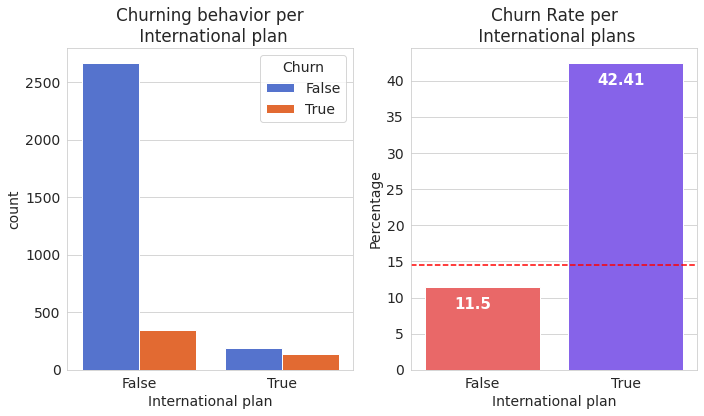

In [46]:
# Create balnk subplots
fig, ax = plt.subplots(nrows= 1, ncols= 2, figsize= (10,6))

# count plot for Area code hue colored by churn on first subplot
sns.countplot(ax= ax[0],data=df, x= 'International plan', hue= 'Churn')

# churn rate per international plan
ch_rt_intl_pln = churn_rate_finder('International plan')

# bar chart for churn rate per area code on 2nd subplot
sns.barplot(ax= ax[1], y= ch_rt_intl_pln.values, x = ch_rt_intl_pln.index, palette = ['#FF5252','#7C4DFF'])

#  writing text on 2nd plot
for j in range(len(ch_rt_intl_pln.index)):
  # ch_rt_intl_pln.iloc[j] is value of churn rate
  ax[1].text(x= j- 0.2,y= ch_rt_intl_pln.iloc[j] - 3  ,
            s= round(ch_rt_intl_pln.iloc[j], 2), fontsize=15, weight='bold',
                color='white')
  
# horizontal line at y = 14.5  in 2nd plot , (14.5 is overll churn rate) which we have calculated above
ax[1].axhline(y = churn_percent, color = 'red',ls= '--')


    
# set title on subplots
ax[0].set_title("Churning behavior per\n International plan")
ax[1].set_title("Churn Rate per\n International plans")

# set label on y- axis in 2nd plot
ax[1].set_ylabel("Percentage")

plt.tight_layout();

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

Customers having International plans have overall high churn rate.

**Violineplot of Total international minutes per International plans hued by Churn**

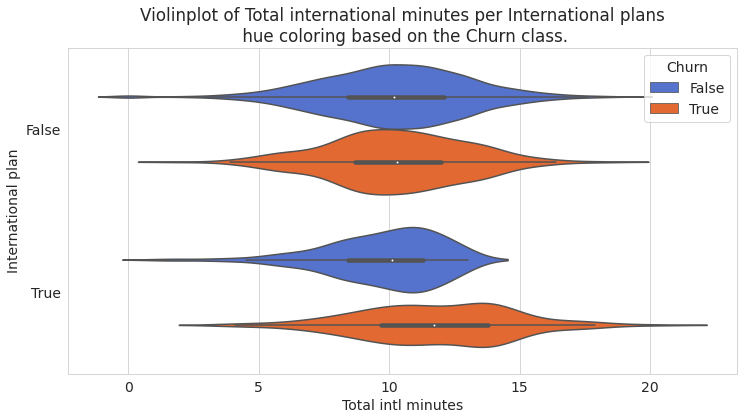

In [47]:
# Create blank figure object
plt.figure(figsize= (12,6))

# Violineplot of Total international minutes per International plans hued by Churn
sns.violinplot(data= df, x= 'Total intl minutes', y= 'International plan', hue= 'Churn', orient= 'h')

# add title
plt.title("Violinplot of Total international minutes per International plans\n hue coloring based on the Churn class.");

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**

* If customer have an international plan then churn rate is high for large values of total international minutes. 

* But for customers who don't have an international plan, the churn rate is independent of the total international minutes.
---

**Let's see the distribution of Total International call with Churn label.**

In [48]:
# Histogram using plotly 
fig = px.histogram(df, x='Total intl calls', color="Churn", marginal="box", 
                   title="Histogram of Total international calls hue colored by and Stacked by Churn")

# Churn true is Stacked over churn False
fig.show()

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**

We can see that the churn rate is high for low Total intl calls, but as number of Total intl calls increases the churn rate is gradually decreased.

---
**Countplot of Total international calls per International plan hued by Churn**

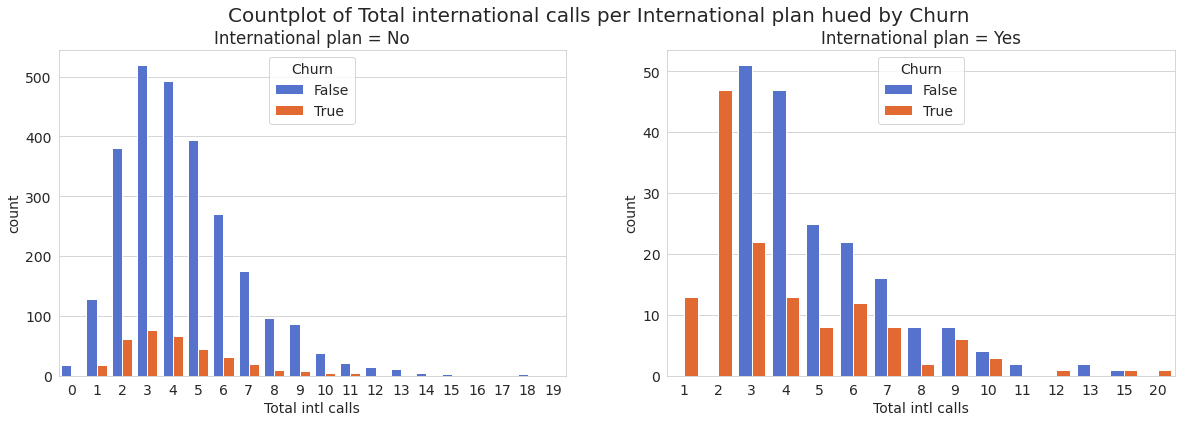

In [49]:
# Creating balnk canvas
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize= (20,6))

# Countplot of Total international calls of customers that have International plan hued by Churn
sns.countplot(ax= axes[0], data=df[(df['International plan']==  False)],hue='Churn',x='Total intl calls')
# set title on first subplot
axes[0].set_title("International plan = No")

# Countplot of Total international calls of customers without International plan hued by Churn
sns.countplot(ax= axes[1],data=df[(df['International plan']== True)],hue='Churn',x='Total intl calls')
# set title on 2nd subplot
axes[1].set_title("International plan = Yes")

# add super title for both the sub plot
fig.suptitle('Countplot of Total international calls per International plan hued by Churn', fontsize=20);

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**

**Users without international**
* Churn and retain behavior  plans follow  same pattern.

**Users with International Plans**
*  Regardless of any number total international calls Churn rate is very high 
* Not single user retained till 2 calls.

___
# **Conclusion:**

**Customers are not satisfied with international plans**
* The Churn rate of customers who have taken international plans is much higher.
* Customers who did not take international plan also make international calls but their churn rate is normal.

# Observation 7 :
**Churn analysis with Voice mail plans and number of Voice mail messages**

We have seen that Voice mail plans and number of Voice mail messages are highly correlated.

In [50]:
# Voice mail plan percentage 
percnt_of_user_voice_plan = 100 * (df['Voice mail plan'] == True).mean()
print(f"{percnt_of_user_voice_plan:.2f}% of users have Voice mail plans.");

27.66% of users have Voice mail plans.


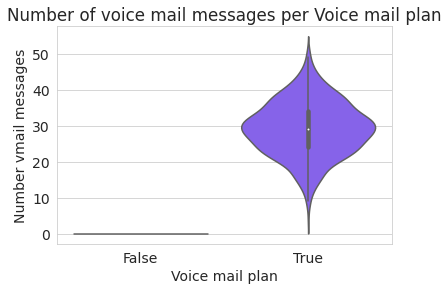

In [51]:
# Violinplot for Voice mail plan and Number of vmail messages
sns.violinplot(data= df, y= 'Number vmail messages', x= 'Voice mail plan', palette  = ['#FF4081', '#7C4DFF'])
plt.title("Number of voice mail messages per Voice mail plan");

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**

* Those who don't have a voicemail plan don't send voicemails.
* Number of voicemails messages is also symettrically distributed.
* As we have already seen, most people do not send any voicemail.(Histogram of each numerical attributes)


Let's analyze
* Churning behavior per Voice mail plans.
* Churn Rate per Voice mail plan.  

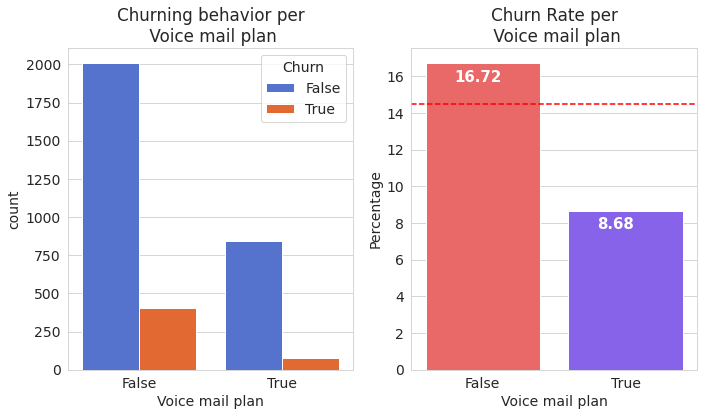

In [52]:
# Create figure object
fig, ax = plt.subplots(nrows= 1, ncols= 2, figsize= (10,6))

# count plot for Area code hue colored by churn
sns.countplot(ax= ax[0],data=df, x= 'Voice mail plan', hue= 'Churn')

# churn rate per voice mail plan
ch_rt_vm_pln = churn_rate_finder('Voice mail plan')

# bar plot for churn rate per voice mail plan
sns.barplot(ax= ax[1], y= ch_rt_vm_pln.values, x = ch_rt_vm_pln.index, palette = ['#FF5252','#7C4DFF'])

#  writing text on 2nd plot
for j in range(len(ch_rt_vm_pln.index)):
  # ch_rt_vm_pln.iloc[j] is value of churen rate
  ax[1].text(x= j- 0.2,y= ch_rt_vm_pln.iloc[j] - 1 ,
            s= round(ch_rt_vm_pln.iloc[j], 2), fontsize=15, weight='bold',
                color='white')
# horizontal line at y = 14.5  in 2nd plot , (14.5 is overll churn rate) 
ax[1].axhline(y = churn_percent, color = 'red',ls= '--')
    
# set title and y label
ax[0].set_title("Churning behavior per\n Voice mail plan")
ax[1].set_title("Churn Rate per\n Voice mail plan")
ax[1].set_ylabel("Percentage")

plt.tight_layout();

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**

* Churn rate of users is **low** if they **have vmail** plans, almost half
  * **8.68 %**   for those who **have vmail** plan 
  * **16.72 %**  for those who **dont have vmail** plan.
___

<br/>

**Let's analyze the behavior of only those customers who have taken vmail plans**

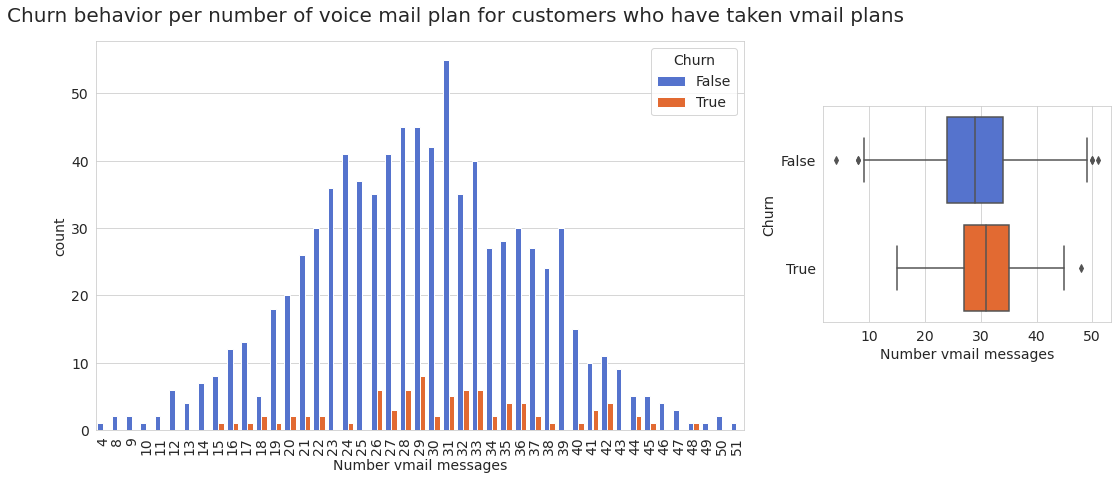

In [53]:
# Creates a blanck canvas
fig= plt.figure(figsize=(10,6))

# select only those users that have Voice mail plan
df_with_vmail_plan = df[df['Voice mail plan'] == True]

# main axes, it take list of 4 parameter that are dimensions [left, bottom, width, height] of the new axes.
ax1= fig.add_axes([0, 0, 0.9, 0.9])

# Count plot per 'Number of voice message' hue colored by churn on main axes
sns.countplot(data= df_with_vmail_plan, x= 'Number vmail messages', hue= 'Churn' , ax= ax1)

# adjust legend position
plt.legend(loc=1, title = "Churn")

# rotate x-label on main axes
plt.xticks(rotation=90)

# insert small axes 
ax2= fig.add_axes([1.01, 0.25, 0.4,0.5]);

# box plot for overall churn behavior per Number of vmail messages 
sns.boxplot(data= df_with_vmail_plan, x= 'Number vmail messages', y= 'Churn' , ax= ax2, orient= 'h')

# add super title for all subplots 
fig.suptitle('Churn behavior per number of voice mail plan for customers who have taken vmail plans', fontsize=20);

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**

* **User with vmail plan**
    *  Churn rate is low if user have taken vmail plan.
    * As number of vmail messages increases then chances of getting churned is also increasing, especially there is sudden rise in churn after 25 vmail messages..
* **User without vmail plan**
  * Dont do vmail messages.
-----
# **Conclusion:**

* **Hurray, it seems that customer are satisfied with voice mail plan but why they are churnig if they send more vmails.**

* **But vmail plan unable to satisfy all types of customers** 

# Observation 8:

**Let's dive deep down into total day, evening and night minutes**

We have seen that, the **Total day minutes** have postive correlation with Churn.

**Analyze it on**
* Scatterplot
* Histogram
* Boxplot

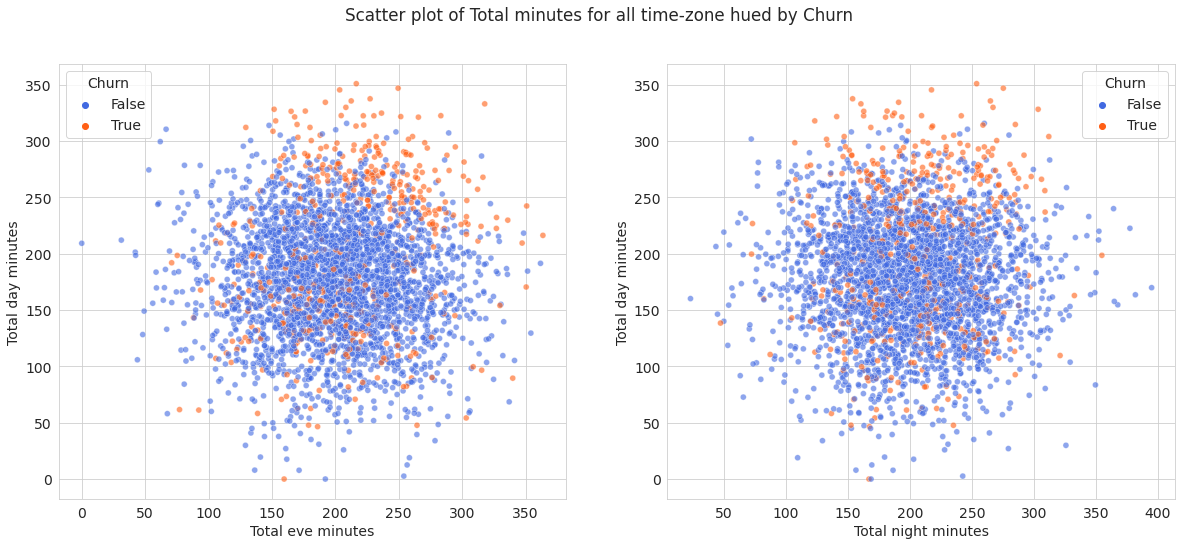

In [54]:
# Create blank figure object
fig, ax = plt.subplots(nrows= 1, ncols= 2, figsize= (20,8))

# Scatter plot of Total eve minutes vs Total day minutes hue colored by Churn
sns.scatterplot(data= df, x= 'Total eve minutes', y= 'Total day minutes', hue= 'Churn', alpha= 0.6, ax= ax[0])

# Scatter plot of Total day minutes vs Total night minutes hue colored by Churn
sns.scatterplot(data= df, x= 'Total night minutes', y= 'Total day minutes', hue= 'Churn', alpha= 0.6, ax= ax[1])

# add super title for all subplots
fig.suptitle('Scatter plot of Total minutes for all time-zone hued by Churn');

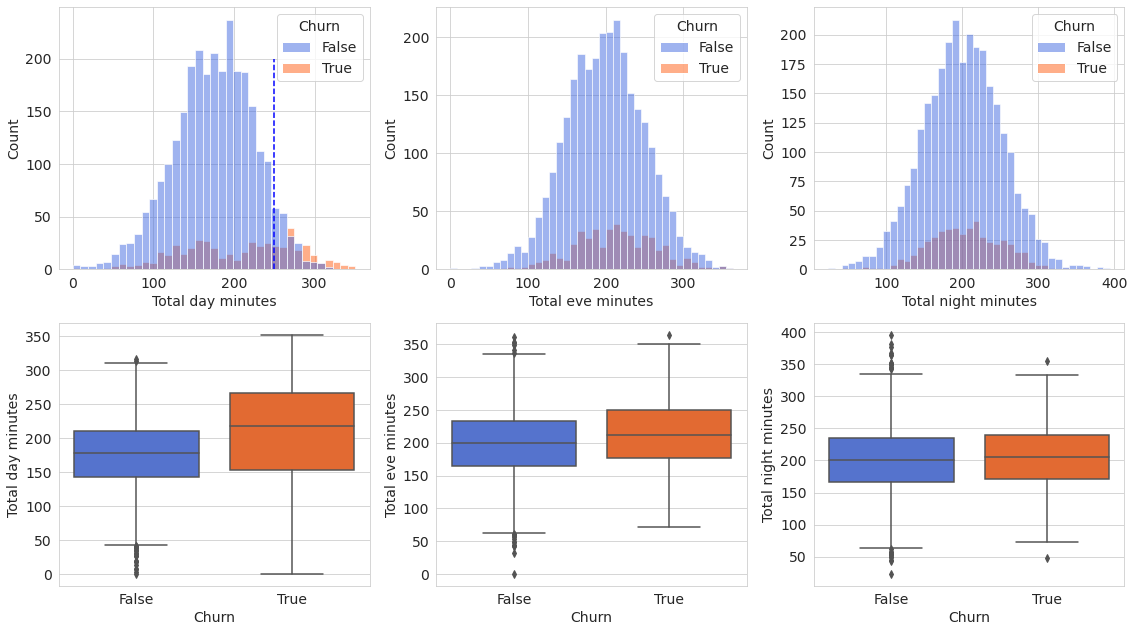

In [55]:
fig, ax = plt.subplots(nrows= 2, ncols= 3, figsize= (16,9))
# list of total minutes for all time zone
lst_minutes = ['Total day minutes','Total eve minutes', 'Total night minutes']

# for 1st row (histogram)
for i,minutes in enumerate(lst_minutes):  
  sns.histplot(ax= ax[0,i], data= df, x= minutes, hue= 'Churn')

# vertical line at 250 in ax[0,0]
ax[0,0].vlines(x = 250, ymin = 0, ymax = 200,colors = 'blue',ls= '--')

# for 2nd row (box-plot)
for i,minutes in enumerate(lst_minutes):  
  sns.boxplot(ax= ax[1,i], data= df, y= minutes, x= 'Churn')

plt.tight_layout();  

**For better visulization lets cteate it on plotly so that we can see median values of total minutes for all timezone.**
___
**For total night minutes** 

In [56]:
# histogram
fig = px.histogram(df, x='Total night minutes', color="Churn", marginal="box", 
                   title="Histogram of Total night minutes hue colored by and Stacked by Churn")

# Churn true is Stacked over churn False

fig.show()

**For Evening night minutes**

In [57]:
fig = px.histogram(df, x='Total eve minutes', color="Churn", marginal="box", 
                   title="Histogram of Total evening minutes hue colored by and Stacked by Churn")

# Churn true is Stacked over churn False
fig.show()

**For total day minutes, main area of concern**

In [58]:
fig = px.histogram(df, x='Total day minutes', color="Churn", marginal="box", 
                   title="Histogram of Total day minutes hue colored by and Stacked by Churn")

# Churn true is Stacked over churn False
fig.show()

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**


* **For Day Users**

   * The churn rate of the user who talks more on the phone has been seen higher. 
      *  It can be seen that the median value is 217.6 minutes for churning customer and 177.2 minutes for non- churning customers.
 
   * We have already seen in kdeplot and histogram that the user do less talk in day, this is because day user are churning more.  

* **For Evening and Night Users**
  * The churn behavior is the same for all users, although the in box plot median is slightly higher for chured user in evening times, but the difference is that high compare to day users.
---

# **Conclusion**

  * We have noticed that the charges are higher during day time as compared to evening and night, this is the first reason for customer dissatisfaction.
  * Other reason could be day traffic.


# **Suggestion**
* Customers are unhappy with the **day services and plans**, company will have to offer attractive plans and tariffs for day users.


# Observation 9:
**Customer Service call**

**First analyze distribution of customers per service calls.** 

In [59]:
# calculating percentage of customers per service calls
customers_by_ser_calls = 100 * df.groupby("Customer service calls")['Churn'].count() / len(df)

In [60]:
customers_by_ser_calls  

Customer service calls
0    20.912091
1    35.433543
2    22.772277
3    12.871287
4     4.980498
5     1.980198
6     0.660066
7     0.270027
8     0.060006
9     0.060006
Name: Churn, dtype: float64

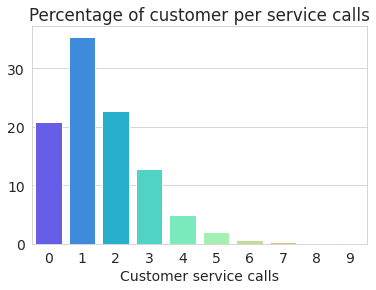

In [61]:
# bar plot for percentage of service calls by users
# 20.91 percent of users don't any service calls , 35.43 percent of user once called for service cente etc...
sns.barplot(x = customers_by_ser_calls.index, y=customers_by_ser_calls.values, palette= 'rainbow')
plt.title("Percentage of customer per service calls");

* The number of customer service calls greater than 3 is significantly low. 

**We have seen that churning behavior have positive correlation with customer service call, let's analysis it.** 

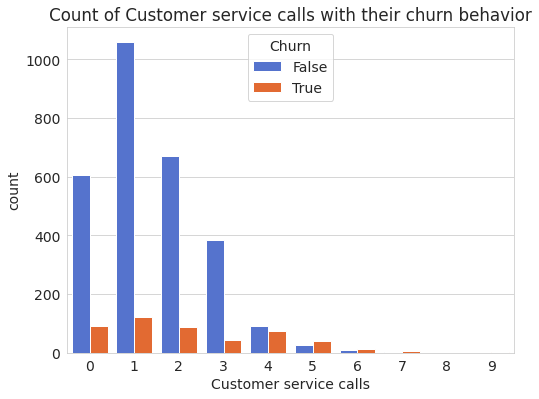

In [62]:
plt.figure(figsize=(8,6))

# count plot per service calls by users , hue colored by Churn
sns.countplot(data=df,x='Customer service calls',hue='Churn')
plt.title("Count of Customer service calls with their churn behavior");

**Let's look at closely , for customer service call grater than 3**

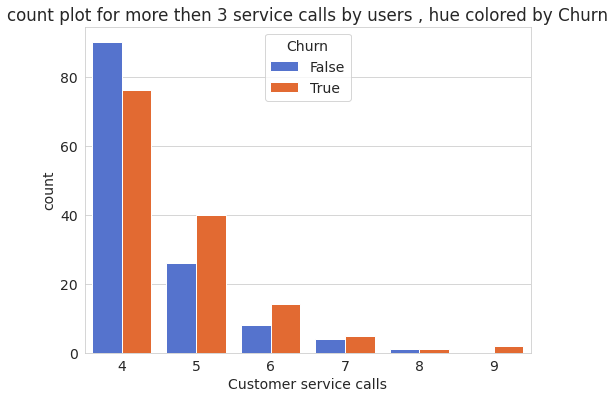

In [63]:
plt.figure(figsize=(8,6))
# same thing as above but for customer with more then 3 service calls
sns.countplot(data=df[df['Customer service calls']>3],x='Customer service calls',hue='Churn')

plt.title("count plot for more then 3 service calls by users , hue colored by Churn");

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**

* Churn rate increases significantly for **4 or more calls** to the customer service.

____
**Let's calculate churn rate per Customer service calls and then plot it.**


In [64]:
churn_rate_ser_call =  churn_rate_finder("Customer service calls") 
churn_rate_ser_call

Customer service calls
0     13.199426
1     10.330229
2     11.462451
3     10.256410
4     45.783133
5     60.606061
6     63.636364
7     55.555556
8     50.000000
9    100.000000
Name: Churn, dtype: float64

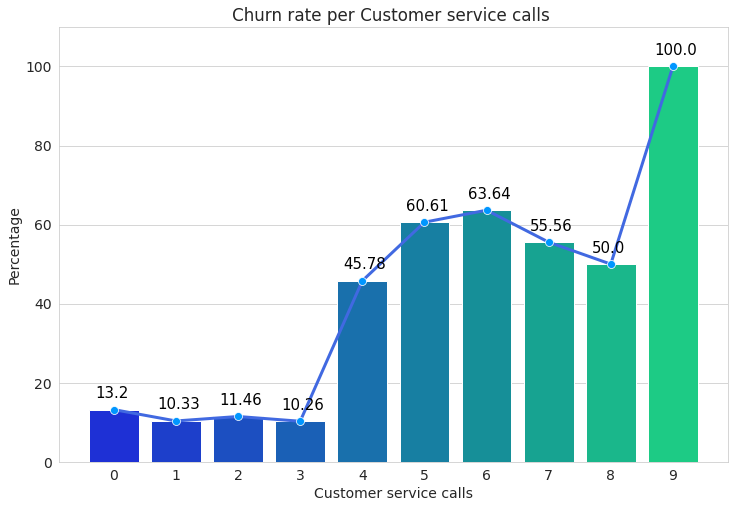

In [65]:
# for size of plot
plt.figure(figsize=(12,8))

# bar plot for churn rate per service calls
sns.barplot(x = churn_rate_ser_call.index, y= churn_rate_ser_call.values, palette='winter')


# line plot for churn rate per service calls
sns.lineplot(x = churn_rate_ser_call.index, y= churn_rate_ser_call.values,
             ls='-', marker='o',ms=8, markerfacecolor= "#0096FF", 
             estimator=None, linewidth=3);


# writing text on a bar plot
for i in range(len(churn_rate_ser_call)):
  plt.text(x= i- 0.3,y= churn_rate_ser_call.iloc[i] + 3,
           s= round(churn_rate_ser_call.iloc[i], 2), fontsize=15,
                color= 'black')


# set  title , ylimit and y_label
plt.title("Churn rate per Customer service calls ")

plt.ylabel("Percentage")  
plt.ylim(0,110);


<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**

* This shows that the churn rate is very high if customer service calls is more then 3 times. It seems that their problum is not properly resolved.

* And lots of customers resolve their problems before 4 service calls, that why they have retained.

____

<br/>

We are creating **broader** Cohort Groups based on the **total day minutes** column values because this is field that we are more concerned, we create a new column called **Tenure day minutes** that creates 5 separate categories:

* 0-100 minutes

* 100-160 minutes

* 160-220 minutes

* 220-250  minutes

* above 250 minutes

In [66]:
# binning method in panda data frame
df['Tenure day minutes'] = pd.cut(df['Total day minutes'], 
                             bins= [-1,100.0, 150.0, 200.0, 250, np.inf],
                             labels= ['0-100 mins', '100-150 mins', '150-200 mins', '200-250 mins', 'over 250 mins'])

# I am choosing  starting point as -1 because if I choose 0 then it will create null value for total day minutes is zero

In [67]:
df.head(10)[['Total day minutes','Tenure day minutes']]

Total day minutes Tenure day minutes
0              265.1      over 250 mins
1              161.6       150-200 mins
2              243.4       200-250 mins
3              299.4      over 250 mins
4              166.7       150-200 mins
5              223.4       200-250 mins
6              218.2       200-250 mins
7              157.0       150-200 mins
8              184.5       150-200 mins
9              258.6      over 250 mins

**Creating a grid of Count Plots showing counts per Service calls, separated out by Tenure day minutes and colored by the Churn hue.**

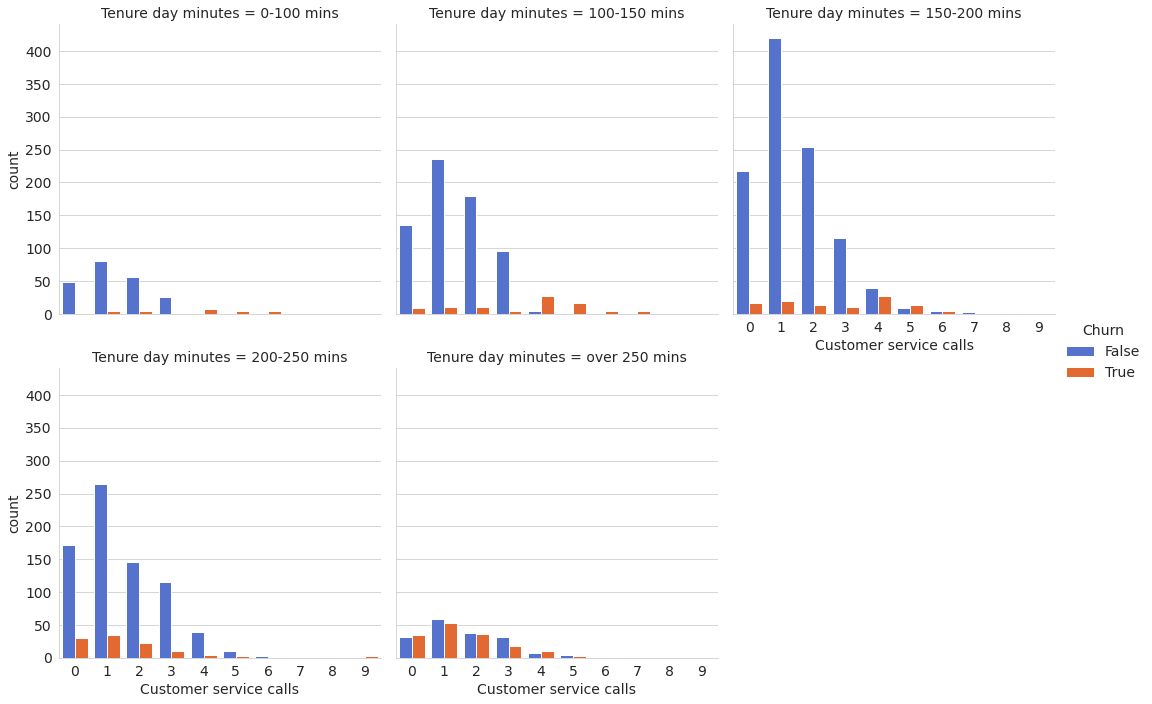

In [68]:
sns.catplot(data=df,col='Tenure day minutes',hue='Churn',x='Customer service calls',kind='count',col_wrap= 3);

**Doing same analysis by creating two different data frame.** 

In [69]:
df_less_4 =  df[~(df['Customer service calls'] > 3)]    # data frame for ('Customer service calls')  <= 3
df_4_or_more = df[(df['Customer service calls'] > 3)]  # data frame for ('Customer service calls')  > 3

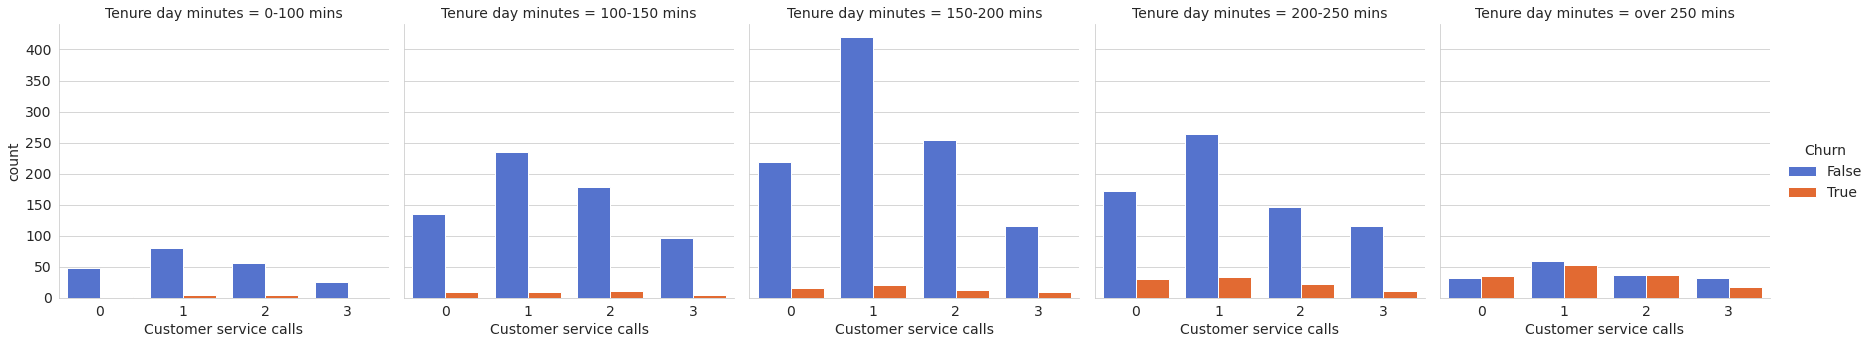

In [70]:
# for less then 4 service calls
sns.catplot(data= df_less_4,col='Tenure day minutes',hue='Churn',x='Customer service calls',kind='count');

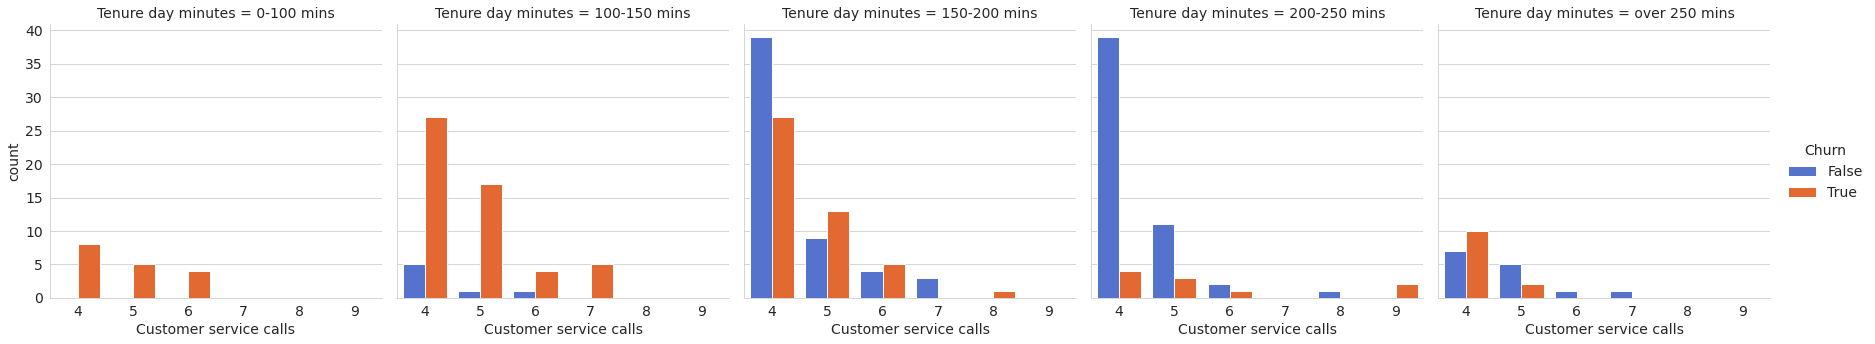

In [71]:
# for more then 3 service calls
sns.catplot(data= df_4_or_more,col='Tenure day minutes',hue='Churn',x='Customer service calls',kind='count');

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**


* Customers who talk less in a day (below 200) do not churn so easily until their problem is solved, they are trying to solve their problems by talking to the service center as much as possible, even after that if their problems are not resolved then they churn.

* Customers who talk more during the day have higher churn rate even in low service calls, which means they are not happy with the high call rate call rate during the day.


<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=1sJtIStrGS6tRxrEq0Q-9Q2_oc8HgHRim" align="left" hspace="10px" vspace="27px" width="75" height="80" ></p>




# Data preprocessing for Churning rate with various states of USA 
**Creating new dataframe for passing in choromap**

In [72]:
# number of retained customer per state
no_churn_by_state = df.groupby(['Churn', "State"])['Account length'].count()[False]

# number of churned customer per state
yes_churn_by_state = df.groupby(['Churn', "State"])['Account length'].count()[True]

# churn rate per state (We are not directly calculating the churn rate because we need above two series)
churn_rate_by_state = 100 * yes_churn_by_state / (yes_churn_by_state + no_churn_by_state)

# create integer index 
churn_rate_by_state = churn_rate_by_state.reset_index()

# remaning column
churn_rate_by_state.rename(columns = {'Account length':'Churn rate'}, inplace = True) 

# rounding off the churn rate column by 2 digits
churn_rate_by_state['Churn rate'] = churn_rate_by_state['Churn rate'].apply( lambda x: round(x, 2))

# showing  15 observations
churn_rate_by_state.head(15).T

0     1     2     3      4      5      6     7      8     9   \
State         AK    AL    AR    AZ     CA     CO     CT    DC     DE    FL   
Churn rate  5.77  10.0  20.0  6.25  26.47  13.64  16.22  9.26  14.75  12.7   

               10    11    12     13    14  
State          GA    HI    IA     ID    IL  
Churn rate  14.81  5.66  6.82  12.33  8.62

In [73]:
# adding new columns which have number of retained customer per state
churn_rate_by_state['Not Churned'] = no_churn_by_state.values 

# adding new columns which have number of Churned customer per state
churn_rate_by_state['Churned'] = yes_churn_by_state.values

In [74]:
# showing  15 observations
churn_rate_by_state.head(15).T

0     1     2     3      4      5      6     7      8     9   \
State          AK    AL    AR    AZ     CA     CO     CT    DC     DE    FL   
Churn rate   5.77  10.0  20.0  6.25  26.47  13.64  16.22  9.26  14.75  12.7   
Not Churned    49    72    44    60     25     57     62    49     52    55   
Churned         3     8    11     4      9      9     12     5      9     8   

                10    11    12     13    14  
State           GA    HI    IA     ID    IL  
Churn rate   14.81  5.66  6.82  12.33  8.62  
Not Churned     46    50    41     64    53  
Churned          8     3     3      9     5

In [75]:
# key is code and value is full name of that state 
states = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}

In [76]:
 # creating dataframe from above dictionary
state_name_info = pd.DataFrame({'State':list(states.keys()), 'State name': list(states.values())})
state_name_info.head(15).T

0        1         2        3           4         5   \
State           AK       AL        AR       AZ          CA        CO   
State name  Alaska  Alabama  Arkansas  Arizona  California  Colorado   

                     6                     7         8        9        10  \
State                CT                    DC        DE       FL       GA   
State name  Connecticut  District of Columbia  Delaware  Florida  Georgia   

                11    12     13        14  
State           HI    IA     ID        IL  
State name  Hawaii  Iowa  Idaho  Illinois

In [77]:
# merging two datframe on state column by inner join
df_state_final = pd.merge(state_name_info, churn_rate_by_state, how= 'inner', on= 'State') 

In [78]:
# showing  20 observations
df_state_final.head(20).T

0        1         2        3           4         5   \
State            AK       AL        AR       AZ          CA        CO   
State name   Alaska  Alabama  Arkansas  Arizona  California  Colorado   
Churn rate     5.77     10.0      20.0     6.25       26.47     13.64   
Not Churned      49       72        44       60          25        57   
Churned           3        8        11        4           9         9   

                      6                     7         8        9        10  \
State                 CT                    DC        DE       FL       GA   
State name   Connecticut  District of Columbia  Delaware  Florida  Georgia   
Churn rate         16.22                  9.26     14.75     12.7    14.81   
Not Churned           62                    49        52       55       46   
Churned               12                     5         9        8        8   

                 11    12     13        14       15      16        17  \
State            HI    IA     ID        IL       IN      KS        KY   
State name   Hawaii  Iowa  Idaho  Illinois  Indiana  Kansas  Kentucky   
Churn rate     5.66  6.82  12.33      8.62    12.68   18.57     13.56   
Not Churned      50    41     64        53       62      57        51   
Churned           3     3      9         5        9      13         8   

                    18             19  
State               LA             MA  
State name   Louisiana  Massachusetts  
Churn rate        7.84          16.92  
Not Churned         47             54  
Churned              4             11

In [79]:
#  creating a function, for passing some text on choromap

def creat_text(df, lst_merge):
  """function that return, the material that I passed in choromap"""
  
  # creating empty target list. 
  list_text = []
  # length of list that passed 
  length= len(lst_merge)
  # length of dataframe that passed 
  len_df = len(df)

  # looping through entire dataframe, each iteration will create text for each observation (row of dataframe)
  # outer loop
  for i in range(len_df):
    # emplty text, later I will add text on it
    text = ''
    # looping through length of list. Each iteration will add data related to each element of list that we passed as argument
    # inner loop
    for j in range(length): 
      # jth index from list, ith index from dataframe 
      if j == 0:
        # we are not adding title (from passed list) for j == 0
        text =  text + df[lst_merge[j]].iloc[i] + '<br>'   # The <br> tag inserts a single line break, 
      elif j == (length - 1):
        text =  text + lst_merge[j] + ' : '  + str(df[lst_merge[j]].loc[i])   # at end of sentence we dont need <br>
      else:
        text =  text + lst_merge[j] + ' : '  + str(df[lst_merge[j]].loc[i]) + '<br>' 
    
    # append the text, in each iteration of outer loop 
    list_text.append(text)

  return list_text

# checking the function
# creat_text(df_state_final, ['State name', 'Churned', 'Not Churned'])

# ''' simple version of same function 

# def creat_text2(df, name, ch, nch):
#   list_text = []
#   for i in range(len(df)):
#     string= df[name].loc[i] + '<br>' + 'Churned : '  + str(df[ch].loc[i]) + "<br>" + "Not Churned: " + str(df[nch].loc[i])
#     list_text.append(string)

#   return list_text'''

# checking the function
# creat_text2(df_state_final, 'State name', 'Churned', 'Not Churned') 


In [80]:
# adding text column 
df_state_final['text'] = creat_text(df_state_final, ['State name', 'Churned', 'Not Churned'])

# Observation 10:

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=1MUmlmWazOcCyU7m30AwZuDKaoeZ2Gizi" align="left" hspace="25px" vspace="20px" width="50" height="60" ></p>

**Churn rate for different states by choromap**

[choropleth plotly documentation](https://plotly.com/python/choropleth-maps/)

In [81]:
# """geographical ploting for usa"""

# First giving data in map
data = dict(type='choropleth',                        # type of map
            colorscale = 'viridis',                   # color rate eg.. viridis, magma or other..
            reversescale = True,                      # reversing the color scale 
            locations = df_state_final['State'],      # State, district or country. we are passing all code of the US state
            z = df_state_final['Churn rate'],         # Data that will be passed on each state              
            locationmode = 'USA-states',              # USA- state , because we are ploting on usa state
            text = df_state_final['text'],            #  text that we write on map
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 1)),  # for border between two state
            colorbar = {'title': "Churn Rate"}        #   Title on choropleth scale
            ) 

# for title layout
layout = dict(title = 'Churn Rate By State',         # title of the plot(map)
              geo = dict(scope='usa',
                        showlakes = True,
                        lakecolor = 'rgb(85,173,240)')
            )

# data is passed in list, layout is just passed as it is
choromap = go.Figure(data = [data],layout = layout)

# iplot of notebook,
iplot(choromap)

# for save it as html file
# plot(choromap)  

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**


* This behavior shows that some regions have high churn rate and some have low.
  * One of the reasons for this **could be** that the service in those areas is not good.

  * 2nd, there **may be** other competitors in those areas that provide better service.
_________
_________

We can select only those states by conditional selection, in which the Churn rate is **more than 20**.(Special area of concern)

# **Churn Analysis, Specific to high churning rate areas.**

**In this section we will focus only those States for which churn rate  is above 20**

In [82]:
# function that map the churn rate of that state for each of the users
def churn_rate_state_finder(name):
  # df_state_final have only 51 colums, and each state is unique and have its churn rate 
  #  we are extracting the chrun rate value of each state from df_state_final 
  val = df_state_final['Churn rate'][df_state_final['State'] == name].values[0]
  return val

In [83]:
# checking for any state
churn_rate_state_finder('AK')

5.77

In [84]:
# Passing churn rate for each customer according to his state in df
df['churn_rate_of_state'] = df.apply(lambda x: churn_rate_state_finder(x['State']), axis= 1)

In [85]:
# checking the sate with its mapped value
df[['State','churn_rate_of_state']].head(20).T

0      1      2      3      4     5      6      7   \
State                   KS     OH     NJ     OH     OK    AL     MA     MO   
churn_rate_of_state  18.57  12.82  26.47  12.82  14.75  10.0  16.92  11.11   

                       8     9      10    11    12     13    14     15     16  \
State                  LA    WV     IN    RI    IA     MT    IA     NY     ID   
churn_rate_of_state  7.84  9.43  12.68  9.23  6.82  20.59  6.82  18.07  12.33   

                        17    18    19  
State                   VT    VA    TX  
churn_rate_of_state  10.96  6.49  25.0

In [86]:
# Creating new dataframe by using conditional selection, for specific state which have churn rate above 20

threshold_churn_rate = 20
new_df = df[df['churn_rate_of_state']  > threshold_churn_rate]


# percengae of customer in our new dataframe number of
print(f"new data have {100 * len(new_df) / len(df): 0.2f} %, of overall customers.\n")

# no of state in our new dataframe
print(f"We are focusing on {new_df['State'].nunique()} out of {df['State'].nunique()} State.")

new data have  21.12 %, of overall customers.

We are focusing on 11 out of 51 State.


In [ ]:
 # after selecting new dataframe I am dropping churn_rate_of_state because its part is done
new_df.drop('churn_rate_of_state', axis= 1, inplace =True)

# renaming the Churn to 'Churn new' for distigution with old data
new_df.rename(columns= {'Churn': 'Churn new'}, inplace= True)

# ---------------------- for correlation ---------------------------
# data frame with numerical features (including boolean datatype)
df_nums_new = new_df.select_dtypes(exclude= 'object') 
 # data frame with categorical feature 
df_objs_new = new_df.select_dtypes(include= 'object') 


# to create dummy variables, drop_firt is for one hot-encoding, drop state because it will create too many columns
df_objs_new = pd.get_dummies(df_objs_new.drop('State', axis= 1), drop_first= True)
# concatinate state , numeric and object (after one-hot encoding)  columns 
df_final_new = pd.concat([df_nums_new , df_objs_new ], axis= 1)


# finding correlation matrix for new_df
corr_new_df = df_final_new.corr()

# correlation with target variable
# first value is 1 (self correlation), so we ignoring it
corr_to_label_new  = corr_new_df['Churn new'].sort_values(ascending= False).iloc[1:]  

#--------------------------------These steps in dashed line -------we have done earlier


# we are concatinating series corr_to_label_special to another series corr_to_label (old one) to create a dataframe
# It will concatinate based on index labeling
corr_to_label_df = pd.concat([corr_to_label, corr_to_label_new], axis= 1).reset_index()

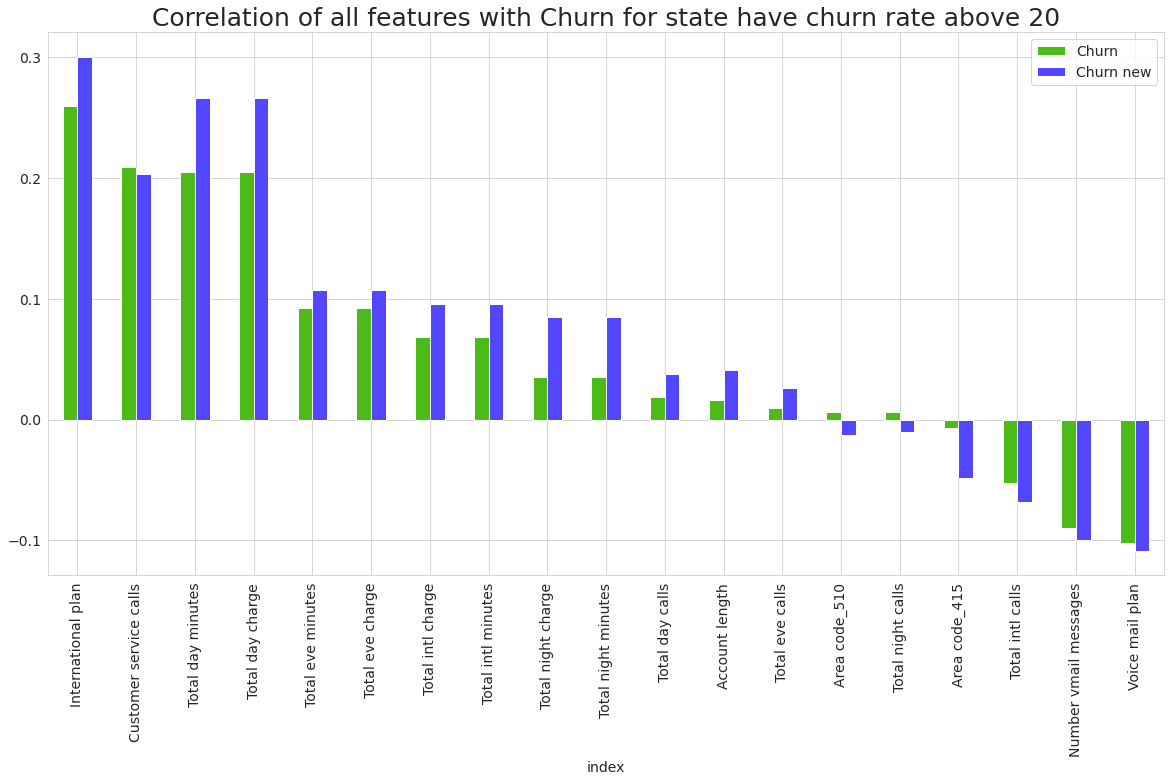

In [101]:
# bar plot
corr_to_label_df.plot(x= 'index' , y=["Churn", "Churn new"], kind="bar", figsize=(20,10), color= ['#4CBB17', '#5247fc'])

#  add title
plt.title("Correlation of all features with Churn for state have churn rate above 20", fontsize= 25)

# rotating test on x-axis  
plt.xticks(rotation=90);

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**

* **Except a few, almost all features follow the same churning pattern but with amplified magnitude.**

* **The Total night minutes also playing role in churning.**
  * The people of these areas are not as happy with the night facilities as the people of the whole country.
  * The company can launch better night calls tariff for some selected states.

* Previously area code was not that much correlated, but this time figure shows some kind of correlation with area code also.


# Observation 11:
# Curse of dimensionality 
Curse of Dimensionality refers to a set of problems that arise when working with high-dimensional data. The dimension of a dataset corresponds to the number of attributes/features that exist in a dataset. A dataset with a large number of attributes.

Some of the difficulties that come with high dimensional data manifest during analyzing or visualizing the data to identify patterns, and some manifest while training machine learning models.
___
# **Dimensionality Reduction**

<br/>

One of the most important aspects of Dimensionality reduction, it is Data Visualization. Having to drop the dimensionality down to two or three, make it possible to visualize the data on a 2d or 3d plot, meaning important insights can be gained by analyzing these patterns in terms of clusters and much more.

<br/>

**For analysing the data I am reducing dataset to 2 dimension.**

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE

In [90]:
df_final.columns

Index(['State', 'Account length', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Churn', 'Area code_415',
       'Area code_510'],
      dtype='object')

In [91]:
#  before scaling oue data we  are dropping churn and state label ,
# Churn is our target variable and "State" have too many categories
df_final = df_final.drop(['State', 'Churn'], axis= 1)  

**Note**

It is a personal choice to pass the churn_rate_of_state feature, we can ignore this column while passing the data to the model like we will ignore the state column.

In [92]:
df_final['churn_rate_of_state'] = df.apply(lambda x: churn_rate_state_finder(x['State']), axis= 1)

In [93]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   int64  
 1   International plan      3333 non-null   bool   
 2   Voice mail plan         3333 non-null   bool   
 3   Number vmail messages   3333 non-null   int64  
 4   Total day minutes       3333 non-null   float64
 5   Total day calls         3333 non-null   int64  
 6   Total day charge        3333 non-null   float64
 7   Total eve minutes       3333 non-null   float64
 8   Total eve calls         3333 non-null   int64  
 9   Total eve charge        3333 non-null   float64
 10  Total night minutes     3333 non-null   float64
 11  Total night calls       3333 non-null   int64  
 12  Total night charge      3333 non-null   float64
 13  Total intl minutes      3333 non-null   float64
 14  Total intl calls        3333 non-null   

In [94]:
# scaling our parameter
scaler = StandardScaler()  # creating StandardScaler object
scaled_X = scaler.fit_transform(df_final)  # scaling our data using fit transform

# **Kernel PCA**





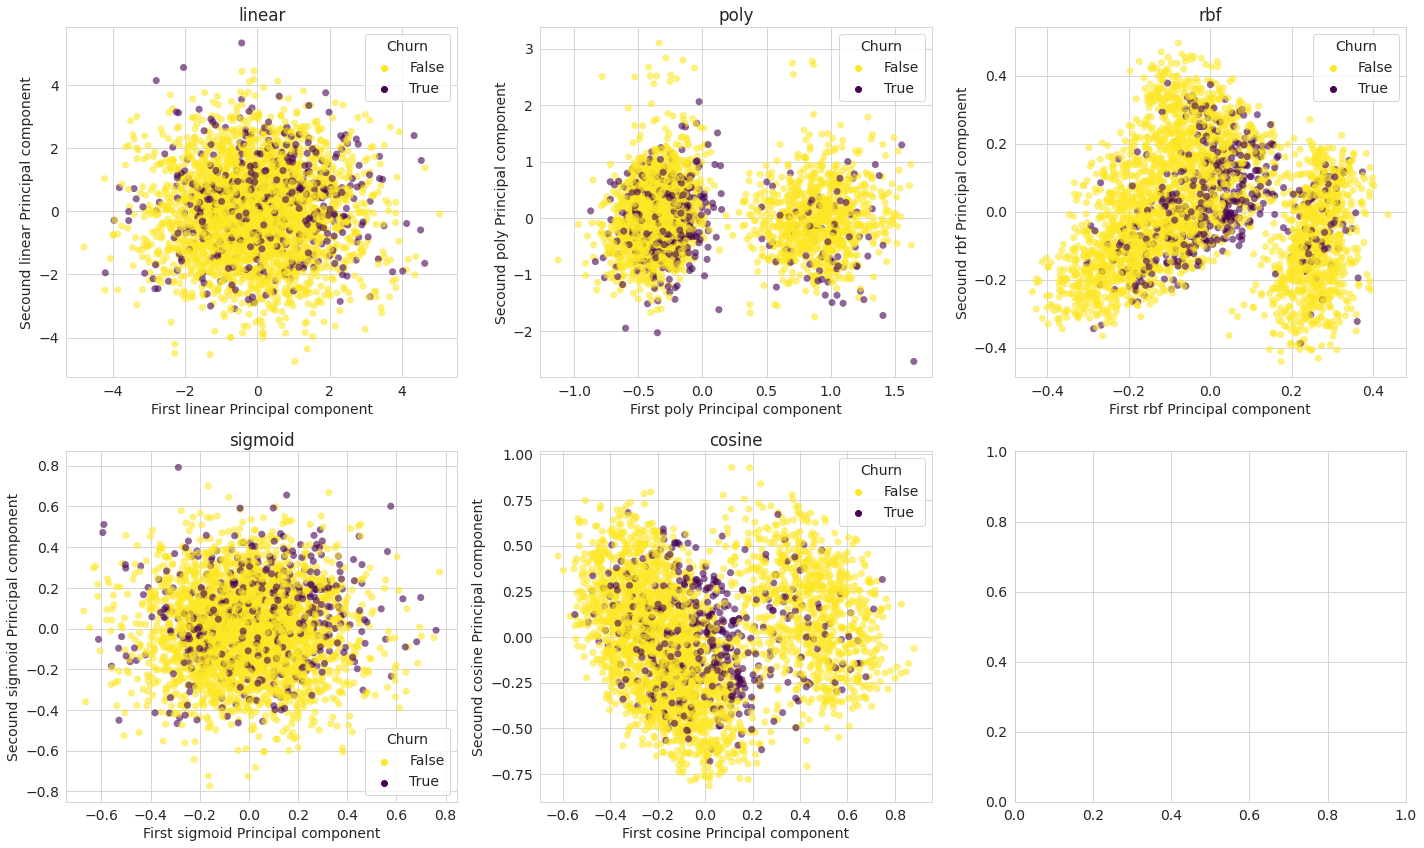

In [95]:
# creating a blank canvas
fig, axes = plt.subplots(nrows= 2, ncols= 3, figsize= (20, 12))

# list of kernels we use in kernel pca
list_of_kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'cosine']

# i is index 
for i, kernel in enumerate(list_of_kernels):
  # creating a object of kpca
  kpca = KernelPCA(n_components=2, random_state= 0, kernel= kernel)
  # passing scaled data
  kpca_comp = kpca.fit_transform(scaled_X)

  # setting axes of the plot
  ax = axes[i//3, i % 3]
  # scatter plot for 2 components of kernel pca, hue and colored by churn
  sns.scatterplot(kpca_comp[:,0],kpca_comp[:,1], hue= df['Churn'], linewidth=0,
                  alpha = 0.6,  palette=  ['#fde725', '#440154'], ax= ax, s= 50)

  # setting xlabel, ylabel and title
  ax.set_xlabel(f"First {list_of_kernels[i]} Principal component")
  ax.set_ylabel(f"Secound {list_of_kernels[i]} Principal component")
  ax.set_title(list_of_kernels[i])

plt.tight_layout();

# t- SNE

**T-distributed Stochastic Neighbor Embedding**

In [96]:
# t- SNE, reducing it to 2-components
tsne = TSNE(n_components=2, random_state= 0)  # creating t-sne object
tsne_comps = tsne.fit_transform(scaled_X)     # passing our scaled data 

# Ploting 

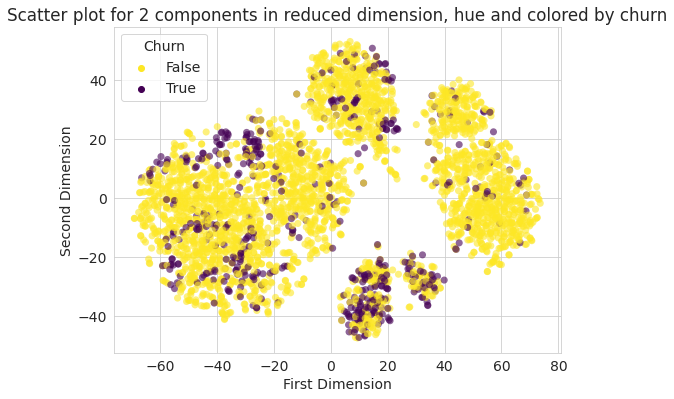

In [97]:
plt.figure(figsize= (8,6))

# scatter plot for 2 components of tsne, hue and colored by churn
sns.scatterplot(tsne_comps[:,0],tsne_comps[:,1], hue= df['Churn'], alpha = 0.6, s= 50, palette=  ['#fde725', '#440154'], linewidth=0)

plt.title("Scatter plot for 2 components in reduced dimension, hue and colored by churn")
plt.xlabel("First Dimension")
plt.ylabel("Second Dimension");

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**


* **When we look at it in the Reduced dimension, we will find that all those dissatisfied customers who have churn are grouped together, and are unhappy with a particular policy.**
* **Out of all the decomposition we can see that t-SNE is the best decomposition for our data**

In [98]:
# Creating two kind of customer segments based on total day minutes
df['Tenure total day minutes'] = pd.cut(df['Total day minutes'], 
                             bins= [-1, 230.0, np.inf],
                             labels= ['below 230', 'over 230'])

In [99]:
# Creating two kind of customer segments based on number of call for service 
df['Tenure service calls'] = df['Customer service calls'].apply(lambda x: "4 or above" if x >= 4 else "below 4")

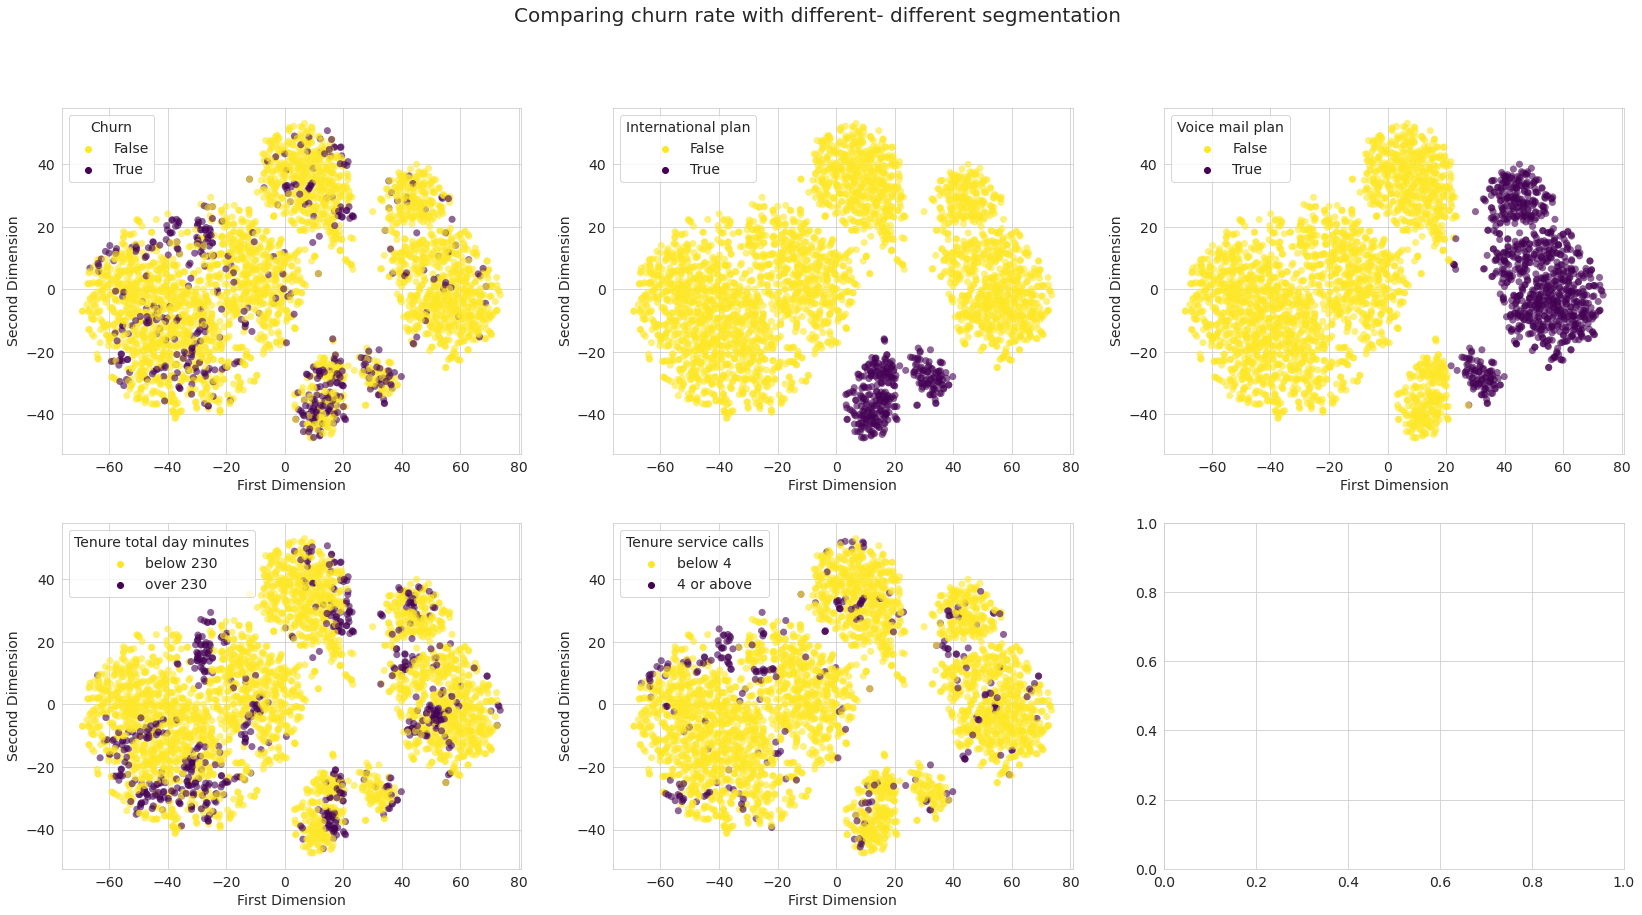

In [100]:
fig, axes = plt.subplots(nrows= 2, ncols= 3, figsize= (28,14))

lst_of_concern = ['Churn', 'International plan','Voice mail plan','Tenure total day minutes', 'Tenure service calls']

for i, item in enumerate(lst_of_concern):
  # setting up axes
  ax= axes[i//3, i % 3]
  # scatter plot for 2 components of tsne, hue and colored by item in list
  sns.scatterplot(tsne_comps[:,0],tsne_comps[:,1], hue= df[item], linewidth=0,
                  alpha = 0.6,  palette=  ['#fde725', '#440154'], ax= ax, s= 50)
  
  ax.set_xlabel(f"First Dimension")
  ax.set_ylabel(f"Second Dimension")


fig.suptitle('Comparing churn rate with different- different segmentation', fontsize=20);

# Open this image in new tab for better comparison 

_______________

**Analyzing the churn cause in the reduced dimension by grouping on the basis of features**

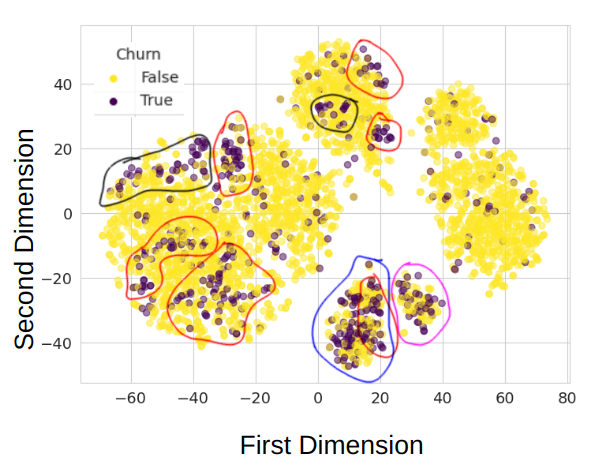

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

**Insights:**

**Some region with very high churn rate**, I marked them and their behavior can be explained as 

* **Blue** marked region are customers with **International plans** but **no voice mail plan.**
  * These are the customers that are not satisfied by our international plans.

* **Magenta** marked region are customer with both **International and Voice mail plan.**
  * These are the customers that are not satisfied by either international plans or Voice mail plan or both.

* **Red** marked regions are the customers who talk more than 230 minutes in a day
  * They are not satisfied by our **high call rate of the day.**

* **Black** marked region are those users that have called 4 or more times in service centre. 
    * Their problem are not properly resolved.




<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=14dpaeXX-ajsM8quwe3dCCdQdrdvf29iI" align="left" hspace="20px" vspace="20px" width="45" height="60" ></p>

#**Overall Conclusion**

---

1. **Observation 1**
  * 14.5% of Orange Telecom's customers have churned, from a customer churn perspective it's still high.Our job will be to reduce it as much as possible.

2. **Observation 2**
  * Charges for International calls are highest, followed by day, then evening and night calls are cheapest.
  * On average, our customers prefer to talk more at night and evening than during the day.

3. **Observation 3**
  * Most of the feature approximately follows Normal Distribution, means most of the values centered around mean of the distribution. As we move away from centre their value count gradually decrease.
  * Most people don't send any voicemails.
  * The graph of total international calls and Customer service calls are positively skewed.

4. **Observation 4**
  * Number of Voice mail is highly correlated with voice mail plan.
  * Total day minutes is perfectly correlated with total day charge, and it follows same pattern in evening, nights minutes and international minutes with charges.

  **Churn Lable have**

  * Positive correlation with
    * International plan, means for those users who have taken the international plan, there is a high chance of getting churned.
    * Customer service calls,If the customer makes more service calls, the chances of churn are also higher.
    * Total day minutes is also positivly correlated, we will further explore it.

  * Negative correlation with
    * Voice mail plan, means for those users who have taken the Voice mail plan, then chance of getting churn will reduce.
    * We have already seen that, if person has a voicemail plan, only then s(he) sends voicemail.

  * Almost zero  correlation with

    * Account length, Area code and total calls at any time.

5. **Observation 5**

  * As we can see that Account length, Area code, total calls at different time does not affect the churn behavior of the customers.
  * Area code 415 has twice as many customers as others.

6. **Observation 6**

  **Customers are not satisfied with international plans**
    * The Churn rate of customers who have taken international plans is much higher than average.
    * Customers who did not take international plan also make international calls but their churn rate is normal.

7. **Observation 7**

 * It seems that customer are satisfied with voice mail plan.

 * Voicemail plan unable to satisfy all types of customers, those who send more vmails

8. **Observation 8**

  * We have noticed that the charges are higher during day time as compared to evening and night, this is the first reason for customer dissatisfaction.

9. **Observation 9**

 * Churn rate increases significantly for 4 or more calls to the customer service.

 * Customers who talk less in a day (below 200) do not churn so easily until their problem is solved, they are trying to solve their problems by talking to the service center as much as possible, even after that if their problems are not resolved then they churn.

  * Customers who talk more during the day have higher churn rate even in low service calls, means they are not happy high call rate in day.

10. **Observation 10**
  * Churn rate is very high in few state like  New Jersey, california, Texas etc.


11. **Observation 11**

  * In reduced dimensions, dissatisfied customers are grouped together, same dissatisfaction was observed in group, users that are not satisfied by particular policy are Churning together.

# **Recommendations**
----
For  Churn Prevention: How to retain your customers

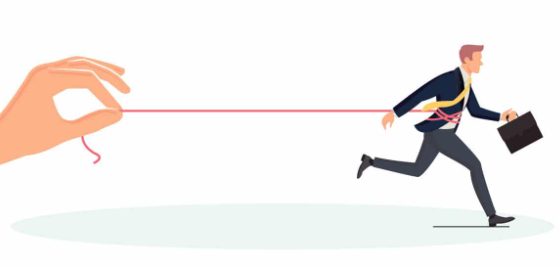

Many customers do international conversations, but most of them have not taken any international plan, do they dislike our international plan.
And those who have taken it, their churn rate is very high.

# First Suggestion
* **We need a very attractive international plan, which can provide satisfaction to the customers making international calls.**

---
___

By the way, the customer who has taken the voicemail plan has seen a lower Churn rate, which means that our voicemail plan is good, But customers who send more emails have seen higher churn rates.

# Second Suggestion 

* **We need a new voice mail plan along with the old one which is specially designed keeping in mind the more voicemail senders.**

---
---

We noticed that people who call customer service more than 3 times, their churn rate is drastically increased, means despite calling the service center so many times, their problem could not be solved.

# Third Suggestion

* **Need to improve the feedback system that doesn't ignore customer problems**
___
---
We noticed that the call rate of the day is high, so the customers who talk more during the day have seen higher churn rate than others.
They have higher churn rate even in  service calls  less than 3, means they do not like any of our day's  plans, they do not want to listen to any excuses.

# Fourth Suggestion


* **Need to introduce better tariff plans for day calling which is specially designed for users to talk too much in a day.**

____
____

The churn rate has also been seen high among the callers in the evening, but it is less than the day.

# Fifth suggestion

* **Therefore, there is a need for improvement in the evening tariff plans as well**,
----
----

In the states where the churn rate is more than 20, there is a slight dislike for the night calls.

# Sixth suggestion

* **The company can launch better night calls tariff which is specifically designed for specific states.**

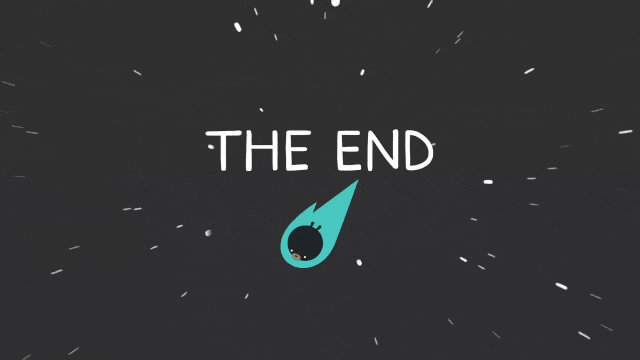